<a href="https://colab.research.google.com/github/annu100/AI1103/blob/main/sidelink_plots_Srividya_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## import

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyarrow.parquet as pq
import os
import glob
import pandas as pd
from pathlib import Path
import seaborn as sns
sns.set()

In [ ]:
data_path = Path.cwd().parent/"data"
plot_dir =  Path.cwd().parent/"plots"

# processing part

In [ ]:
sidelink_df = pd.read_parquet("/content/sidelink_dataframe.parquet")
sidelink_df = sidelink_df.assign(**{"SL3 Role": 'None'})
sidelink_df.loc[sidelink_df.syncref_source, "SL3 Role"] = "TX"
sidelink_df.loc[sidelink_df.syncref_destination, "SL3 Role"] = "RX"

In [ ]:
plot_df = sidelink_df.query("`Source` != `Destination` & `SL3 Role` == 'None'")
plot_df = plot_df.assign(link=lambda x: x.Source.astype(str)+r"$\rightarrow$"+x.Destination.astype(str))

In [ ]:
plot_df['syncref_source'].value_counts()

False    167840
Name: syncref_source, dtype: int64

In [ ]:
plot_df['SL3 Role'].value_counts()

None    167840
Name: SL3 Role, dtype: int64

In [ ]:
print(sidelink_df['SL3 Role'].value_counts())
print(sidelink_df.shape)

None    167880
TX       82134
RX       75854
Name: SL3 Role, dtype: int64
(325868, 67)


In [ ]:
sidelink_df

,Source,Destination,Scenario,time_epoch,SNR,RSRP,RSSI,NOISE POWER,RX_GAIN,SubFrame_NUMBER,...,Pos_in_Ref_Round_destination,device_destination,area_destination,syncref_source,syncref_destination,distance,Packet_transmission_rate_hz,Sub_channels,Packet_error_ratio,SL3 Role
timestamp,,,,,,,,,,,,,,,,,,,,,
2021-06-22 09:51:48+02:00,2,4,S1,1.624348e+09,14.144092,-71.160341,-41.737488,0.002013,44.0,426.941176,...,15118.046494,pc4,Avenue,False,False,30.631466,20,2,0.15,None
2021-06-22 09:51:48+02:00,4,2,S1,1.624348e+09,15.227671,-68.752400,-46.970770,0.004633,45.0,463.300000,...,15156.001352,pc2,Avenue,False,False,30.631466,20,2,0.00,None
2021-06-22 09:51:49+02:00,4,2,S1,1.624348e+09,15.273688,-67.572225,-45.746560,0.006282,45.0,102.500000,...,15143.190884,pc2,Avenue,False,False,27.982724,20,2,0.00,None
2021-06-22 09:51:49+02:00,2,4,S1,1.624348e+09,14.295098,-70.777137,-46.170142,0.002737,44.0,100.526316,...,15118.046494,pc4,Avenue,False,False,27.982724,20,2,0.05,None
2021-06-22 09:51:50+02:00,4,2,S1,1.624348e+09,15.494669,-69.356312,-47.530865,0.007427,45.0,200.294118,...,15130.561672,pc2,Avenue,False,False,24.855905,20,2,0.15,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-23 17:07:00+02:00,2,4,S2,1.624461e+09,12.810686,-77.330367,-49.631543,0.000524,40.0,493.761905,...,380.041232,pc4,Park,False,False,13.994021,50,10,0.58,None
2021-06-23 17:07:00+02:00,2,3,S2,1.624461e+09,7.966860,-74.786447,-47.084520,0.002939,46.0,491.200000,...,359.306424,pc3,Park,False,True,16.196722,50,10,0.70,RX
2021-06-23 17:07:00+02:00,4,2,S2,1.624461e+09,13.532171,-78.470617,-50.735069,0.000349,40.0,504.914286,...,369.711773,pc2,Park,False,False,13.994021,50,10,0.30,None


In [ ]:
print(tx_df.shape)
print(rx_df.shape)
print(tx_df.columns)
print()

NameError: ignored

In [ ]:
print("receiver source")
print(rx_df['Source'].value_counts())
print("\ndestination")
c=rx_df['Destination'].value_counts()
d=c.values
print(d[0])

In [ ]:
print("transmitter source")
a=tx_df['Source'].value_counts()
b=a.values
print(b[0])
print("\ndestination")
print(tx_df['Destination'].value_counts())
print(tx_df['Destination'].isna().sum())
print(b[0]-d[0])

In [ ]:
for s in tx_df[destination]:


In [ ]:
n_rows_to_delete=6280
df=tx_df
#df = df.drop(df.index[-n_rows_to_delete:])
df = df[:-n_rows_to_delete]
df.shape

In [ ]:
delay=[]
#print(rx_df['time_epoch'].head(5))
#print(df['time_epoch'].head(5))
s=len(rx_df)
for i in range(s):
  delay.append(rx_df['time_epoch'].iloc[i]-df['time_epoch'].iloc[i])
  #rx_df['delay'].iloc[i]=rx_df['time_epoch'].iloc[i]-df['time_epoch'].iloc[i]

In [ ]:
for i in range(100):
  print(delay[i])

In [ ]:
from collections import Counter
counted_values = Counter(delay)
for value, count in counted_values.items():
    print(f"Value {value} appears {count} times.")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
sidelink_df = pd.read_parquet("/content/sidelink_dataframe.parquet")
# Assign SL3 Roles (TX/RX)
sidelink_df = sidelink_df.assign(**{"SL3 Role": 'None'})
sidelink_df.loc[sidelink_df.syncref_source, "SL3 Role"] = "TX"
sidelink_df.loc[sidelink_df.syncref_destination, "SL3 Role"] = "RX"
# Filter the dataset for TX and RX roles
tx_df = sidelink_df[sidelink_df["SL3 Role"] == "TX"]
rx_df = sidelink_df[sidelink_df["SL3 Role"] == "RX"]
# Basic analysis: Plot SNR vs. Distance for TX and RX
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tx_df, x='SNR', y='distance', hue='Scenario', marker='o', label='TX')
sns.scatterplot(data=rx_df, x='SNR', y='distance', hue='Scenario', marker='x', label='RX')
plt.xlabel("SNR [dB]")
plt.ylabel("Distance [m]")
plt.title("SNR vs. Distance for TX and RX")
plt.legend()
plt.grid(True)
plt.savefig("SNR_vs_Distance.png")
# Additional analysis can be performed based on specific resource allocation algorithms and requirements.
# This includes scheduling, QoS, power control, etc., which require more advanced analysis and modeling.
# For a more comprehensive resource allocation analysis, you may need to consider network simulations or optimization techniques.
# Remember to customize the analysis based on your specific use case and objectives.


In [ ]:
rx_df.shape

In [ ]:
rx_df

In [ ]:
tx_df.shape

In [ ]:
tx_df

In [ ]:
a=(rx_df['time_epoch']-tx_df['time_epoch'])
print(a.value_counts())

In [ ]:
(rx_df['time_epoch']-tx_df['time_epoch']).shape

#Keshvi Work

In [ ]:
import pandas as pd
import random
import time

# Load your dataset
sidelink_df = pd.read_parquet("/content/sidelink_dataframe.parquet")

# Assign the "SL3 Role" column
sidelink_df = sidelink_df.assign(**{"SL3 Role": 'None'})
sidelink_df.loc[sidelink_df.syncref_source, "SL3 Role"] = "TX"
sidelink_df.loc[sidelink_df.syncref_destination, "SL3 Role"] = "RX"

# Filter the DataFrame to include only relevant rows
plot_df = sidelink_df.query("`Source` != `Destination` & `SL3 Role` == 'None'")

# Create the "link" column
plot_df = plot_df.assign(link=lambda x: x.Source.astype(str) + r"$\rightarrow$" + x.Destination.astype(str))

# Parameters
num_nodes = 5  # Number of nodes in the network
min_backoff = 1  # Minimum backoff time (in seconds)
max_backoff = 5  # Maximum backoff time (in seconds)
max_attempts = 3  # Maximum number of transmission attempts
channel_busy = False  # Initialize channel state

# Function to simulate a node attempting to transmit using CSMA/CA
def node_transmit(node_id, df):
    global channel_busy
    attempts = 0

    while attempts < max_attempts:
        if not channel_busy:
            print(f"Node {node_id}: Transmitting data")

            # Simulate data transmission here
            data_transmitted = simulate_data_transmission(node_id, df)

            if data_transmitted:
                print(f"Node {node_id}: Successful transmission")

                # Process data and mark channel as busy
                process_data(node_id, node_id, df)  # Pass the DataFrame

                # Successful transmission, process data and mark channel as busy
                # You can add your data processing logic here
                channel_busy = True

                return True
            else:
                print(f"Node {node_id}: Transmission failed")

                # Handle collision or retry logic here (Implement your custom collision handling logic)
                handle_transmission_failure(node_id, attempts)

        else:
            print(f"Node {node_id}: Channel is busy, waiting...")
            backoff_time = random.uniform(min_backoff, max_backoff)  # Random backoff time in seconds
            time.sleep(backoff_time)
            attempts += 1

    print(f"Node {node_id}: Maximum attempts reached, giving up")
    return False

# Simulate data transmission (Updated logic)
def simulate_data_transmission(node_id, df):
    # Realistic logic for data transmission
    # Calculate the Signal-to-Interference-plus-Noise Ratio (SINR) for the node
    sinr = calculate_sinr(node_id, df)

    # Check if the SINR is above a threshold for successful transmission
    sinr_threshold = 10  # Example threshold, adjust as needed

    if sinr > sinr_threshold:
        return True  # Successful transmission
    else:
        return False  # Transmission failed due to interference

# Calculate SINR (Example logic)
def calculate_sinr(node_id, df):
    # Placeholder logic for calculating SINR
    # In this example, SINR is calculated based on received power and interference
    received_power = df[df['Source'] == node_id]['Rx_power'].sum()

    # Calculate interference from other nodes
    interference = calculate_interference(node_id, df)

    # Calculate SINR
    sinr = received_power / interference
    return sinr

# Calculate interference (Example logic)
def calculate_interference(node_id, df):
    # Placeholder logic for calculating interference
    # In this example, interference is the sum of received power from other nodes
    interference = df[df['Source'] != node_id]['Rx_power'].sum()
    return interference

# Handle transmission failure (Realistic collision handling)
def handle_transmission_failure(node_id, attempts):
    print(f"Node {node_id}: Transmission failed due to collision or interference")

    if attempts < max_attempts - 1:
        print(f"Node {node_id}: Retrying transmission (Attempt {attempts + 1}/{max_attempts})")

        # Implement custom collision handling logic here (e.g., exponential backoff)
        backoff_time = random.uniform(min_backoff, max_backoff) * (2 ** attempts)  # Exponential backoff
        time.sleep(backoff_time)
    else:
        print(f"Node {node_id}: Maximum retries reached, giving up")

# Process data after successful transmission (Updated logic)
def process_data(source_node, destination_node, df):
    print(f"Node {source_node}: Processing data from Source {source_node} to Destination {destination_node}")

    # Realistic data processing logic
    # Example: Calculate the average SNR and RSRP for the successful transmission
    data = df[(df['Source'] == source_node) & (df['Destination'] == destination_node)]

    avg_snr = data['SNR'].mean()
    avg_rsrp = data['RSRP'].mean()

    print(f"Node {source_node}: Average SNR: {avg_snr}, Average RSRP: {avg_rsrp}")

# Simulation
for index, row in plot_df.iterrows():
    source_node = row['Source']
    destination_node = row['Destination']

    if source_node != destination_node:
        if node_transmit(source_node, sidelink_df):
            # Successful transmission, process data and mark channel as busy
            # You can add your data processing logic here
            channel_busy = True
        else:
            # Transmission failed, handle collision or retry logic here
            pass

    # Simulate channel clearing after transmission
    channel_busy = False

# Add any additional simulation logic or algorithm-specific code here


OSError: ignored

In [ ]:
import pandas as pd
import random
import time

# Load your dataset
sidelink_df = pd.read_parquet("/content/sidelink_dataframe.parquet")

# Parameters
num_nodes = 5  # Number of nodes in the network
min_backoff = 1  # Minimum backoff time (in seconds)
max_backoff = 5  # Maximum backoff time (in seconds)
max_attempts = 3  # Maximum number of transmission attempts
channel_busy = False  # Initialize channel state

# Function to simulate a node attempting to transmit using CSMA/CA
def node_transmit(node_id, sidelink_df):
    global channel_busy
    attempts = 0

    while attempts < max_attempts:
        if not channel_busy:
            print(f"Node {node_id}: Transmitting data")
            # Simulate data transmission here
            success = simulate_data_transmission()

            if success:
                # Successful transmission, process data and mark channel as busy
                process_data(sidelink_df)
                channel_busy = True
                return True
            else:
                # Transmission failed, handle collision or retry logic here
                handle_transmission_failure()
        else:
            print(f"Node {node_id}: Channel is busy, waiting...")
            backoff_time = random.uniform(min_backoff, max_backoff)  # Random backoff time in seconds
            time.sleep(backoff_time)
            attempts += 1

    print(f"Node {node_id}: Maximum attempts reached, giving up")
    return False

# Placeholder function for simulating data transmission (90% success rate)
def simulate_data_transmission():
    success_probability = 0.9
    return random.random() < success_probability

# Placeholder function for collision detection (no collision in this example)
def check_for_collision():
    return False

# Placeholder function for processing data after successful transmission
def process_data(sidelink_df):
    # Implement your data processing logic here
    # Example: Calculate average SNR and RSRP
    avg_snr = sidelink_df['SNR'].mean()
    avg_rsrp = sidelink_df['RSRP'].mean()
    print(f"Average SNR: {avg_snr}, Average RSRP: {avg_rsrp}")

# Placeholder function for handling transmission failures (collisions)
def handle_transmission_failure():
    # Implement actual collision handling logic based on specific requirements
    # Example: Implement exponential backoff and retry mechanisms
    print("Transmission failed due to collision. Implement collision handling logic.")

# Function to simulate channel clearing after transmission
def clear_channel():
    global channel_busy
    channel_busy = False

# Simulation
for index, row in sidelink_df.iterrows():
    source_node = row['Source']
    destination_node = row['Destination']

    if source_node != destination_node:
        if node_transmit(source_node, sidelink_df):
            # Successful transmission, process data and mark channel as busy
            # You can add your data processing logic here
            channel_busy = True
        else:
            # Transmission failed, handle collision or retry logic here
            pass

    # Simulate channel clearing after transmission
    clear_channel()

# Add any additional simulation logic or algorithm-specific code here

# Algorithm 1: Routing Algorithm
def routing_algorithm():
    # Simulate a routing algorithm
    # Determine the optimal path for data transmission based on network conditions
    # Update routing tables, if applicable
    pass

# Algorithm 2: Statistical Analysis
def statistical_analysis():
    # Perform statistical analysis on simulation results
    # Calculate mean, median, standard deviation, etc., for relevant metrics
    # Generate reports or visualizations to summarize the analysis
    pass

# Call the routing algorithm
routing_algorithm()

# Call the statistical analysis
statistical_analysis()


#In this code:

#node_transmit simulates a node attempting data transmission using CSMA/CA.
#simulate_data_transmission is a placeholder for simulating data transmission with a 90% success rate.
#check_for_collision is a placeholder for collision detection (no collision in this example).
#process_data is a placeholder for processing data after successful transmission.
#handle_transmission_failure is a placeholder for handling transmission failures (collisions).
#After each transmission attempt, the channel is cleared using clear_channel.
#Algorithm-specific functions (routing_algorithm and statistical_analysis) are provided as examples at the end of the script.

OSError: ignored

In [ ]:
import pandas as pd
import random
import time

# Load your dataset
sidelink_df = pd.read_parquet("/content/sidelink_dataframe.parquet")

# Parameters
num_nodes = 5  # Number of nodes in the network
min_backoff = 1  # Minimum backoff time (in seconds)
max_backoff = 5  # Maximum backoff time (in seconds)
max_attempts = 3  # Maximum number of transmission attempts
channel_busy = False  # Initialize channel state

# Function to simulate a node attempting to transmit using CSMA/CA
def node_transmit(node_id, sidelink_df):
    global channel_busy
    attempts = 0

    while attempts < max_attempts:
        if not channel_busy:
            print(f"Node {node_id}: Transmitting data")
            # Simulate data transmission here
            success = simulate_data_transmission()

            if success:
                # Successful transmission, process data and mark channel as busy
                process_data(sidelink_df)
                channel_busy = True
                return True
            else:
                # Transmission failed, handle collision or retry logic here
                handle_transmission_failure()
        else:
            print(f"Node {node_id}: Channel is busy, waiting...")
            backoff_time = random.uniform(min_backoff, max_backoff)  # Random backoff time in seconds
            time.sleep(backoff_time)
            attempts += 1

    print(f"Node {node_id}: Maximum attempts reached, giving up")
    return False

# Placeholder function for simulating data transmission (90% success rate)
def simulate_data_transmission():
    success_probability = 0.9
    return random.random() < success_probability

# Placeholder function for collision detection (no collision in this example)
def check_for_collision():
    return False

# Placeholder function for processing data after successful transmission
def process_data(sidelink_df):
    # Implement your data processing logic here
    # Example: Calculate average SNR and RSRP
    avg_snr = sidelink_df['SNR'].mean()
    avg_rsrp = sidelink_df['RSRP'].mean()
    print(f"Average SNR: {avg_snr}, Average RSRP: {avg_rsrp}")
    # You can add more data processing steps here as needed

# Placeholder function for handling transmission failures (collisions)
def handle_transmission_failure():
    # Implement actual collision handling logic based on specific requirements
    # Example: Implement exponential backoff and retry mechanisms
    print("Transmission failed due to collision. Implement collision handling logic.")
    # You can add collision handling code here as needed

# Function to simulate channel clearing after transmission
def clear_channel():
    global channel_busy
    channel_busy = False

# Simulation
for index, row in sidelink_df.iterrows():
    source_node = row['Source']
    destination_node = row['Destination']

    if source_node != destination_node:
        if node_transmit(source_node, sidelink_df):
            # Successful transmission, process data and mark channel as busy
            # You can add your data processing logic here
            channel_busy = True
        else:
            # Transmission failed, handle collision or retry logic here
            pass

    # Simulate channel clearing after transmission
    clear_channel()

# Example 1: Routing Algorithm
def routing_algorithm():
    # Simulate a routing algorithm
    # Determine the optimal path for data transmission based on network conditions
    # Update routing tables, if applicable
    print("Routing algorithm executed.")
    # You can add routing algorithm logic here as needed

# Example 2: Statistical Analysis
def statistical_analysis():
    # Perform statistical analysis on simulation results
    # Calculate mean, median, standard deviation, etc., for relevant metrics
    # Generate reports or visualizations to summarize the analysis
    print("Statistical analysis executed.")
    # You can add statistical analysis logic here as needed

# Example 3: Channel Optimization
def channel_optimization():
    # Implement channel optimization algorithms
    # Adjust transmission power levels or frequencies to maximize network efficiency
    print("Channel optimization executed.")
    # You can add channel optimization logic here as needed

# Example 4: Machine Learning Integration
def machine_learning_integration():
    # Integrate machine learning models for decision-making
    # Use ML models to predict network behavior or optimize parameters
    print("Machine learning integration executed.")
    # You can add machine learning integration logic here as needed

# Add your algorithm-specific code here
# You can call any of the above-defined algorithm functions or implement your own

# Example: Call routing_algorithm
routing_algorithm()

# Example: Call statistical_analysis
statistical_analysis()

# Example: Call channel_optimization
channel_optimization()

# Example: Call machine_learning_integration
machine_learning_integration()

# End of the script


In [ ]:
import pandas as pd
import random
import time

# Load your dataset
sidelink_df = pd.read_parquet("/content/sidelink_dataframe.parquet")

# Parameters
num_nodes = 5  # Number of nodes in the network
min_backoff = 1  # Minimum backoff time (in seconds)
max_backoff = 5  # Maximum backoff time (in seconds)
max_attempts = 3  # Maximum number of transmission attempts
channel_busy = False  # Initialize channel state

# Function to simulate a node attempting to transmit using CSMA/CA
def node_transmit(node_id, sidelink_df):
    global channel_busy
    attempts = 0

    while attempts < max_attempts:
        if not channel_busy:
            print(f"Node {node_id}: Transmitting data")
            # Simulate data transmission here
            success = simulate_data_transmission()

            if success:
                # Successful transmission, process data and mark channel as busy
                process_data(sidelink_df)
                channel_busy = True
                return True
            else:
                # Transmission failed, handle collision or retry logic here
                handle_transmission_failure()
        else:
            print(f"Node {node_id}: Channel is busy, waiting...")
            backoff_time = random.uniform(min_backoff, max_backoff)  # Random backoff time in seconds
            time.sleep(backoff_time)
            attempts += 1

    print(f"Node {node_id}: Maximum attempts reached, giving up")
    return False

# Placeholder function for simulating data transmission (90% success rate)
def simulate_data_transmission():
    success_probability = 0.9
    return random.random() < success_probability

# Placeholder function for collision detection (no collision in this example)
def check_for_collision():
    return False

# Placeholder function for processing data after successful transmission
def process_data(sidelink_df):
    # Implement your data processing logic here
    # Example: Calculate average SNR and RSRP
    avg_snr = sidelink_df['SNR'].mean()
    avg_rsrp = sidelink_df['RSRP'].mean()
    print(f"Average SNR: {avg_snr}, Average RSRP: {avg_rsrp}")
    # You can add more data processing steps here as needed

# Placeholder function for handling transmission failures (collisions)
def handle_transmission_failure():
    # Implement actual collision handling logic based on specific requirements
    # Example: Implement exponential backoff and retry mechanisms
    print("Transmission failed due to collision. Implement collision handling logic.")
    # You can add collision handling code here as needed

# Function to simulate channel clearing after transmission
def clear_channel():
    global channel_busy
    channel_busy = False

# Simulation
for index, row in sidelink_df.iterrows():
    source_node = row['Source']
    destination_node = row['Destination']

    if source_node != destination_node:
        if node_transmit(source_node, sidelink_df):
            # Successful transmission, process data and mark channel as busy
            # You can add your data processing logic here
            channel_busy = True
        else:
            # Transmission failed, handle collision or retry logic here
            pass

    # Simulate channel clearing after transmission
    clear_channel()

# Example 1: Routing Algorithm
def routing_algorithm():
    # Simulate a routing algorithm
    # Determine the optimal path for data transmission based on network conditions
    # Update routing tables, if applicable
    print("Routing algorithm executed.")
    # You can add routing algorithm logic here as needed

# Example 2: Statistical Analysis
def statistical_analysis():
    # Perform statistical analysis on simulation results
    # Calculate mean, median, standard deviation, etc., for relevant metrics
    # Generate reports or visualizations to summarize the analysis
    print("Statistical analysis executed.")
    # You can add statistical analysis logic here as needed

# Example 3: Channel Optimization
def channel_optimization():
    # Implement channel optimization algorithms
    # Adjust transmission power levels or frequencies to maximize network efficiency
    print("Channel optimization executed.")
    # You can add channel optimization logic here as needed

# Example 4: Machine Learning Integration
def machine_learning_integration():
    # Integrate machine learning models for decision-making
    # Use ML models to predict network behavior or optimize parameters
    print("Machine learning integration executed.")
    # You can add machine learning integration logic here as needed

# Add your algorithm-specific code here
# You can call any of the above-defined algorithm functions or implement your own

# Example: Call routing_algorithm
routing_algorithm()

# Example: Call statistical_analysis
statistical_analysis()

# Example: Call channel_optimization
channel_optimization()

# Example: Call machine_learning_integration
machine_learning_integration()

# End of the script


#Srividya work continues from here

#plot_df

In [ ]:
plot_df.columns

Index(['Source', 'Destination', 'Scenario', 'time_epoch', 'SNR', 'RSRP',
       'RSSI', 'NOISE POWER', 'RX_GAIN', 'SubFrame_NUMBER', 'SubFrame_LENGHT',
       'Rx_power', 'MCS', 'Received Packets', 'ts_gps_source',
       'Latitude_source', 'Longitude_source', 'Altitude_source',
       'speed_kmh_source', 'COG_source', 'precipIntensity_source',
       'precipProbability_source', 'temperature_source',
       'apparentTemperature_source', 'dewPoint_source', 'humidity_source',
       'pressure_source', 'windSpeed_source', 'cloudCover_source',
       'uvIndex_source', 'visibility_source', 'Traffic_Jam_Factor_source',
       'Traffic_Street_Name_source', 'Traffic_Distance_source',
       'Pos_in_Ref_Round_source', 'device_source', 'area_source',
       'ts_gps_destination', 'Latitude_destination', 'Longitude_destination',
       'Altitude_destination', 'speed_kmh_destination', 'COG_destination',
       'precipIntensity_destination', 'precipProbability_destination',
       'temperature_desti

In [ ]:
plot_df

,Source,Destination,Scenario,time_epoch,SNR,RSRP,RSSI,NOISE POWER,RX_GAIN,SubFrame_NUMBER,...,device_destination,area_destination,syncref_source,syncref_destination,distance,Packet_transmission_rate_hz,Sub_channels,Packet_error_ratio,SL3 Role,link
timestamp,,,,,,,,,,,,,,,,,,,,,
2021-06-22 09:51:48+02:00,2,4,S1,1.624348e+09,14.144092,-71.160341,-41.737488,0.002013,44.0,426.941176,...,pc4,Avenue,False,False,30.631466,20,2,0.15,None,2$\rightarrow$4
2021-06-22 09:51:48+02:00,4,2,S1,1.624348e+09,15.227671,-68.752400,-46.970770,0.004633,45.0,463.300000,...,pc2,Avenue,False,False,30.631466,20,2,0.00,None,4$\rightarrow$2
2021-06-22 09:51:49+02:00,4,2,S1,1.624348e+09,15.273688,-67.572225,-45.746560,0.006282,45.0,102.500000,...,pc2,Avenue,False,False,27.982724,20,2,0.00,None,4$\rightarrow$2
2021-06-22 09:51:49+02:00,2,4,S1,1.624348e+09,14.295098,-70.777137,-46.170142,0.002737,44.0,100.526316,...,pc4,Avenue,False,False,27.982724,20,2,0.05,None,2$\rightarrow$4
2021-06-22 09:51:50+02:00,4,2,S1,1.624348e+09,15.494669,-69.356312,-47.530865,0.007427,45.0,200.294118,...,pc2,Avenue,False,False,24.855905,20,2,0.15,None,4$\rightarrow$2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-23 17:06:59+02:00,2,4,S2,1.624461e+09,9.879130,-77.677296,-49.943267,0.000876,40.0,415.088889,...,pc4,Park,False,False,13.442979,50,10,0.10,None,2$\rightarrow$4
2021-06-23 17:07:00+02:00,2,4,S2,1.624461e+09,12.810686,-77.330367,-49.631543,0.000524,40.0,493.761905,...,pc4,Park,False,False,13.994021,50,10,0.58,None,2$\rightarrow$4
2021-06-23 17:07:00+02:00,4,2,S2,1.624461e+09,13.532171,-78.470617,-50.735069,0.000349,40.0,504.914286,...,pc2,Park,False,False,13.994021,50,10,0.30,None,4$\rightarrow$2


In [ ]:
for col in plot_df.columns:
  print(f"{plot_df.columns.get_loc(col)} {col}")


0 Source
1 Destination
2 Scenario
3 time_epoch
4 SNR
5 RSRP
6 RSSI
7 NOISE POWER
8 RX_GAIN
9 SubFrame_NUMBER
10 SubFrame_LENGHT
11 Rx_power
12 MCS
13 Received Packets
14 ts_gps_source
15 Latitude_source
16 Longitude_source
17 Altitude_source
18 speed_kmh_source
19 COG_source
20 precipIntensity_source
21 precipProbability_source
22 temperature_source
23 apparentTemperature_source
24 dewPoint_source
25 humidity_source
26 pressure_source
27 windSpeed_source
28 cloudCover_source
29 uvIndex_source
30 visibility_source
31 Traffic_Jam_Factor_source
32 Traffic_Street_Name_source
33 Traffic_Distance_source
34 Pos_in_Ref_Round_source
35 device_source
36 area_source
37 ts_gps_destination
38 Latitude_destination
39 Longitude_destination
40 Altitude_destination
41 speed_kmh_destination
42 COG_destination
43 precipIntensity_destination
44 precipProbability_destination
45 temperature_destination
46 apparentTemperature_destination
47 dewPoint_destination
48 humidity_destination
49 pressure_destination

In [ ]:
import pandas as pd

# Assuming you have a DataFrame called df with the relevant columns

# Convert timestamp columns to datetime objects
plot_df['ts_gps_source'] = pd.to_datetime(plot_df['ts_gps_source'], unit='s')
plot_df['ts_gps_destination'] = pd.to_datetime(plot_df['ts_gps_destination'], unit='s')

# Calculate latency as the time difference in seconds
plot_df['Latency_seconds'] = (plot_df['ts_gps_destination'] - plot_df['ts_gps_source']).dt.total_seconds()

# Now, 'Latency_seconds' column contains the latency between Source and Destination in seconds


In [ ]:
plot_df['Latency_seconds']

timestamp
2021-06-22 09:51:48+02:00    0.0
2021-06-22 09:51:48+02:00    0.0
2021-06-22 09:51:49+02:00    0.0
2021-06-22 09:51:49+02:00    0.0
2021-06-22 09:51:50+02:00    0.0
                            ... 
2021-06-23 17:06:59+02:00    0.0
2021-06-23 17:07:00+02:00    0.0
2021-06-23 17:07:00+02:00    0.0
2021-06-23 17:07:00+02:00    0.0
2021-06-23 17:07:00+02:00    0.0
Name: Latency_seconds, Length: 167840, dtype: float64

In [ ]:
plot_df['uvIndex_source']

timestamp
2021-06-22 09:51:48+02:00    3.0
2021-06-22 09:51:48+02:00    3.0
2021-06-22 09:51:49+02:00    3.0
2021-06-22 09:51:49+02:00    3.0
2021-06-22 09:51:50+02:00    3.0
                            ... 
2021-06-23 17:06:59+02:00    2.0
2021-06-23 17:07:00+02:00    2.0
2021-06-23 17:07:00+02:00    2.0
2021-06-23 17:07:00+02:00    2.0
2021-06-23 17:07:00+02:00    2.0
Name: uvIndex_source, Length: 167840, dtype: float64

#Train-Test Split Analysis

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    mean_absolute_error,
    median_absolute_error,
    mean_absolute_percentage_error,
)
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# Assuming your dataset is loaded as plot_df
# Load your dataset

# Define the features (X) and the target variable (y)
X = plot_df[
    [
        "SNR",
        "RSRP",
        "RSSI",
        "MCS",
        "Received Packets",
        "speed_kmh_source",
        "speed_kmh_destination",
        "distance",
        "Packet_transmission_rate_hz",
        "Sub_channels",
    ]
]
y = plot_df["Packet_error_ratio"]

# Define a list of train-test split methods to explore
split_methods = {
    "Random Split": {"test_size": 0.3, "random_state": 0},
    "Time-based Split": {"test_size": 0.3, "shuffle": False},
    # Add more split methods here if needed
}

# Initialize dictionaries to store results
split_results = {}
pca_results = {}
tsne_results = {}

# Iterate through different split methods
for split_method, split_params in split_methods.items():
    print(f"Performance for {split_method}:")

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, **split_params)

    # Initialize the Random Forest Regressor with optional hyperparameters
    rf_regressor = RandomForestRegressor(n_estimators=100, random_state=0)

    # Train the model on the training set
    rf_regressor.fit(X_train, y_train)

    # Test the model on the testing set
    test_predictions = rf_regressor.predict(X_test)

    # Evaluate the model's performance
    mse = mean_squared_error(y_test, test_predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, test_predictions)
    mae = mean_absolute_error(y_test, test_predictions)
    mape = mean_absolute_percentage_error(y_test, test_predictions)
    medae = median_absolute_error(y_test, test_predictions)

    print("MAE:", mae)
    print("MAPE:", mape)
    print("MedAE:", medae)
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R2 score: {r2}\n")

    # Store split results
    split_results[split_method] = {
        "X_train": X_train,
        "X_test": X_test,
        "y_train": y_train,
        "y_test": y_test,
        "model": rf_regressor,
    }

    # Perform PCA analysis
    pca = PCA(n_components=5)  # You can adjust the number of components as needed
    X_pca = pca.fit_transform(X_train)
    pca_results[split_method] = {
        "explained_variance_ratio": pca.explained_variance_ratio_,
    }

    # Perform t-SNE analysis
    tsne = TSNE(n_components=2, random_state=0)  # You can adjust the number of components as needed
    X_tsne = tsne.fit_transform(X_train)
    tsne_results[split_method] = {"X_tsne": X_tsne}

# Statistical Analysis
# You can perform statistical tests or comparisons on the split results, PCA results, and t-SNE results here.

# For example, comparing the explained variance ratios from PCA across different split methods:
for split_method, pca_result in pca_results.items():
    explained_variance_ratio = pca_result["explained_variance_ratio"]
    print(f"Explained Variance Ratio for {split_method}: {explained_variance_ratio}")

# Visualize t-SNE results
for split_method, tsne_result in tsne_results.items():
    X_tsne = tsne_result["X_tsne"]
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train, cmap=plt.cm.coolwarm)
    plt.title(f"t-SNE Visualization for {split_method}")
    plt.show()


Performance for Random Split:
MAE: 1.986018534367069e-08
MAPE: 1.9860184988435727e-07
MedAE: 1.942890293094024e-16
MSE: 1.986018430251753e-11
RMSE: 4.456476669131965e-06
R2 score: 0.9999999997733666



KeyboardInterrupt: ignored

#splits by RF

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, TimeSeriesSplit, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_absolute_percentage_error
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming your dataset is loaded as plot_df
# Load your dataset

# Define the features (X) and the target variable (y)
X = plot_df[
    [
        "SNR",
        "RSRP",
        "RSSI",
        "MCS",
        "Received Packets",
        "speed_kmh_source",
        "speed_kmh_destination",
        "distance",
        "Packet_transmission_rate_hz",
        "Sub_channels",
    ]
]
y = plot_df["Packet_error_ratio"]

# Define a list of train-test split methods to explore
split_methods = {
    "Random Split": {"test_size": 0.3, "random_state": 0},
    "Split by Time": {"test_size": 0.3, "shuffle": False},
    "Split by Measurement Run": None,  # No specific column, so we'll split based on other criteria
    "Split by Folds (Cross-Validation)": {"n_splits": 5},
    # Add more split methods here if needed
}

# Initialize dictionaries to store results
split_results = {}
pca_results = {}
tsne_results = {}

# Iterate through different split methods
for split_method, split_params in split_methods.items():
    print(f"Performance for {split_method}:")

    if split_method == "Random Split":
        X_train, X_test, y_train, y_test = train_test_split(X, y, **split_params)

    elif split_method == "Split by Time":
        # Assuming data is sorted by time
        train_size = int((1 - split_params["test_size"]) * len(X))
        X_train, X_test = X[:train_size], X[train_size:]
        y_train, y_test = y[:train_size], y[train_size:]

    elif split_method == "Split by Measurement Run":
        # You can define your criteria for splitting here
        # For example, splitting into first 70% and last 30% based on index
        split_index = int(0.7 * len(X))
        X_train, X_test = X[:split_index], X[split_index:]
        y_train, y_test = y[:split_index], y[split_index:]

    elif split_method == "Split by Folds (Cross-Validation)":
        n_splits = split_params["n_splits"]
        kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)

        for train_index, test_index in kf.split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            # Train and evaluate your model on each fold

    # Initialize the Random Forest Regressor with optional hyperparameters
    rf_regressor = RandomForestRegressor(n_estimators=100, random_state=0)

    # Train the model on the training set
    rf_regressor.fit(X_train, y_train)

    # Test the model on the testing set
    test_predictions = rf_regressor.predict(X_test)

    # Evaluate the model's performance
    mse = mean_squared_error(y_test, test_predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, test_predictions)
    mae = mean_absolute_error(y_test, test_predictions)
    mape = mean_absolute_percentage_error(y_test, test_predictions)
    medae = median_absolute_error(y_test, test_predictions)
    mae="{:.4f}".format(mae)
    mape="{:.4f}".format(mape)
    medae="{:.4f}".format(medae)
    mse="{:.4f}".format(mse)
    rmse="{:.4f}".format(rmse)
    print("MAE:", mae)
    print("MAPE:", mape)
    print("MedAE:", medae)
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R2 score: {r2}\n")

    # Store split results
    split_results[split_method] = {
        "X_train": X_train,
        "X_test": X_test,
        "y_train": y_train,
        "y_test": y_test,
        "model": rf_regressor,
    }

    # Perform PCA analysis
    pca = PCA(n_components=5)  # You can adjust the number of components as needed
    X_pca = pca.fit_transform(X_train)
    pca_results[split_method] = {
        "explained_variance_ratio": pca.explained_variance_ratio_,
    }

    # Perform t-SNE analysis
    tsne = TSNE(n_components=2, random_state=0)  # You can adjust the number of components as needed
    X_tsne = tsne.fit_transform(X_train)
    tsne_results[split_method] = {"X_tsne": X_tsne}

# Statistical Analysis
# You can perform statistical tests or comparisons on the split results, PCA results, and t-SNE results here.

# For example, comparing the explained variance ratios from PCA across different split methods:
for split_method, pca_result in pca_results.items():
    explained_variance_ratio = pca_result["explained_variance_ratio"]
    print(f"Explained Variance Ratio for {split_method}: {explained_variance_ratio}")

# Visualize t-SNE results
for split_method, tsne_result in tsne_results.items():
    X_tsne = tsne_result["X_tsne"]
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train, cmap=plt.cm.coolwarm)
    plt.title(f"t-SNE Visualization for {split_method}")
    plt.show()



Performance for Random Split:
MAE: 0.0000
MAPE: 0.0000
MedAE: 0.0000
MSE: 0.0000
RMSE: 0.0000
R2 score: 0.9999999997733666

Performance for Split by Time:
MAE: 0.0000
MAPE: 0.0000
MedAE: 0.0000
MSE: 0.0000
RMSE: 0.0000
R2 score: 1.0

Performance for Split by Measurement Run:
MAE: 0.0000
MAPE: 0.0000
MedAE: 0.0000
MSE: 0.0000
RMSE: 0.0000
R2 score: 1.0



KeyboardInterrupt: ignored

#split with other ensemble models

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, TimeSeriesSplit, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    mean_absolute_error,
    median_absolute_error,
    mean_absolute_percentage_error,
    confusion_matrix,
    classification_report,
)
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import SelectFromModel

# Assuming your dataset is loaded as plot_df
# Load your dataset

# Define the features (X) and the target variable (y)
X = plot_df[
    [
        "SNR",
        "RSRP",
        "RSSI",
        "MCS",
        "Received Packets",
        "speed_kmh_source",
        "speed_kmh_destination",
        "distance",
        "Packet_transmission_rate_hz",
        "Sub_channels",
    ]
]
y = plot_df["Packet_error_ratio"]

# Define a list of train-test split methods to explore
split_methods = {
    "Random Split": {"test_size": 0.3, "random_state": 0},
    "Split by Time": {"test_size": 0.3, "shuffle": False},
    "Split by Measurement Run": None,  # No specific column, so we'll split based on other criteria
    "Split by Folds (Cross-Validation)": {"n_splits": 5},
    # Add more split methods here if needed
}

# Initialize dictionaries to store results
split_results = {}
pca_results = {}
tsne_results = {}

# Iterate through different split methods
for split_method, split_params in split_methods.items():
    print(f"Performance for {split_method}:")

    if split_method == "Random Split":
        X_train, X_test, y_train, y_test = train_test_split(X, y, **split_params)

    elif split_method == "Split by Time":
        # Assuming data is sorted by time
        train_size = int((1 - split_params["test_size"]) * len(X))
        X_train, X_test = X[:train_size], X[train_size:]
        y_train, y_test = y[:train_size], y[train_size:]

    elif split_method == "Split by Measurement Run":
        # You can define your criteria for splitting here
        # For example, splitting into first 70% and last 30% based on index
        split_index = int(0.7 * len(X))
        X_train, X_test = X[:split_index], X[split_index:]
        y_train, y_test = y[:split_index], y[split_index:]

    elif split_method == "Split by Folds (Cross-Validation)":
        n_splits = split_params["n_splits"]
        kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)

        for train_index, test_index in kf.split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            # Train and evaluate your model on each fold

    # Initialize the Random Forest Regressor with optional hyperparameters
    rf_regressor = RandomForestRegressor(n_estimators=100, random_state=0)

    # Train the model on the training set
    rf_regressor.fit(X_train, y_train)

    # Test the model on the testing set
    test_predictions = rf_regressor.predict(X_test)

    # Evaluate the model's performance
    mse = mean_squared_error(y_test, test_predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, test_predictions)
    mae = mean_absolute_error(y_test, test_predictions)
    mape = mean_absolute_percentage_error(y_test, test_predictions)
    medae = median_absolute_error(y_test, test_predictions)

    print("MAE:", mae)
    print("MAPE:", mape)
    print("MedAE:", medae)
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R2 score: {r2}\n")

    # Store split results
    split_results[split_method] = {
        "X_train": X_train,
        "X_test": X_test,
        "y_train": y_train,
        "y_test": y_test,
        "model": rf_regressor,
    }

    # Perform PCA analysis
    pca = PCA(n_components=5)  # You can adjust the number of components as needed
    X_pca = pca.fit_transform(X_train)
    pca_results[split_method] = {
        "explained_variance_ratio": pca.explained_variance_ratio_,
    }

    # Perform t-SNE analysis
    tsne = TSNE(n_components=2, random_state=0)  # You can adjust the number of components as needed
    X_tsne = tsne.fit_transform(X_train)
    tsne_results[split_method] = {"X_tsne": X_tsne}

    # Additional Analyses

    # Learning Curves
    train_sizes, train_scores, test_scores = learning_curve(
        rf_regressor, X_train, y_train, cv=5, scoring="neg_mean_squared_error"
    )

    # Feature Importance Analysis
    feature_importances = rf_regressor.feature_importances_

    # Confusion Matrix and Classification Reports (assuming binary classification)
    # Convert regression predictions to binary classification (e.g., threshold at 0.5)
    y_pred_binary = np.where(test_predictions >= 0.5, 1, 0)
    conf_matrix = confusion_matrix(y_test, y_pred_binary)
    class_report = classification_report(y_test, y_pred_binary)

    # Ensemble Methods (can implement various ensemble techniques)
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor

ensemble_methods = {
    "Bagging Regressor": BaggingRegressor(base_estimator=rf_regressor, n_estimators=10, random_state=0),
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=100, random_state=0),
}

for method_name, ensemble_method in ensemble_methods.items():
    ensemble_method.fit(X_train, y_train)
    ensemble_predictions = ensemble_method.predict(X_test)

    # Evaluate ensemble model's performance
    mse = mean_squared_error(y_test, ensemble_predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, ensemble_predictions)
    mae = mean_absolute_error(y_test, ensemble_predictions)
    mape = mean_absolute_percentage_error(y_test, ensemble_predictions)
    medae = median_absolute_error(y_test, ensemble_predictions)

    mae="{:.4f}".format(mae)
    mape="{:.4f}".format(mape)
    medae="{:.4f}".format(medae)
    mse="{:.4f}".format(mse)
    rmse="{:.4f}".format(rmse)
    print(f"{method_name} - MAE:", mae)
    print(f"{method_name} - MAPE:", mape)
    print(f"{method_name} - MedAE:", medae)
    print(f"{method_name} - MSE: {mse}")
    print(f"{method_name} - RMSE: {rmse}")
    print(f"{method_name} - R2 score: {r2}\n")

    # Statistical Tests (perform statistical tests as needed)
from scipy import stats

split_method1 = "Random Split"
split_method2 = "Split by Time"

# Collect performance metric (e.g., RMSE) for both split methods
rmse_split1 = [rmse for method, results in split_results.items() if method == split_method1][0]
rmse_split2 = [rmse for method, results in split_results.items() if method == split_method2][0]

# Perform a two-sample t-test to compare the means
t_statistic, p_value = stats.ttest_ind(rmse_split1, rmse_split2)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("The difference in performance is statistically significant.")
else:
    print("There is no statistically significant difference in performance.")

    # Visualization (create relevant visualizations)
plt.scatter(y_test, test_predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of Actual vs. Predicted Values")
plt.show()

    # Error Analysis (analyze model errors)
errors = y_test - test_predictions
plt.hist(errors, bins=20)
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors")
plt.show()

    # Model Explainability (use SHAP, LIME, or other explainability methods)
import shap

# Initialize the explainer
explainer = shap.Explainer(rf_regressor, X_train)

# Explain a specific prediction
sample_idx = 0  # Index of the sample you want to explain
shap_values = explainer.shap_values(X_test.iloc[sample_idx])

# Visualize the explanation
shap.summary_plot(shap_values, X_test.iloc[sample_idx], feature_names=X.columns)

# Statistical Analysis
# You can perform statistical tests or comparisons on the split results, PCA results, and t-SNE results here.

# For example, comparing the explained variance ratios from PCA across different split methods:
for split_method, pca_result in pca_results.items():
    explained_variance_ratio = pca_result["explained_variance_ratio"]
    print(f"Explained Variance Ratio for {split_method}: {explained_variance_ratio}")

# Visualize t-SNE results
for split_method, tsne_result in tsne_results.items():
    X_tsne = tsne_result["X_tsne"]
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train, cmap=plt.cm.coolwarm)
    plt.title(f"t-SNE Visualization for {split_method}")
    plt.show()


Performance for Random Split:
MAE: 1.986018534367069e-08
MAPE: 1.9860184988435727e-07
MedAE: 1.942890293094024e-16
MSE: 1.986018430251753e-11
RMSE: 4.456476669131965e-06
R2 score: 0.9999999997733666



KeyboardInterrupt: ignored

# Plot 1 - Distance vs. PER

# Plot 2 - SNR vs. PER/distance


In [ ]:
snrq_df = plot_df.assign(snr_q= pd.qcut(plot_df['SNR'], 100, labels=False))
snrq_map = snrq_df[['SNR','snr_q']].groupby(['snr_q']).mean()

snrq_df['SNR'] = snrq_df['snr_q'].map(snrq_map['SNR'])

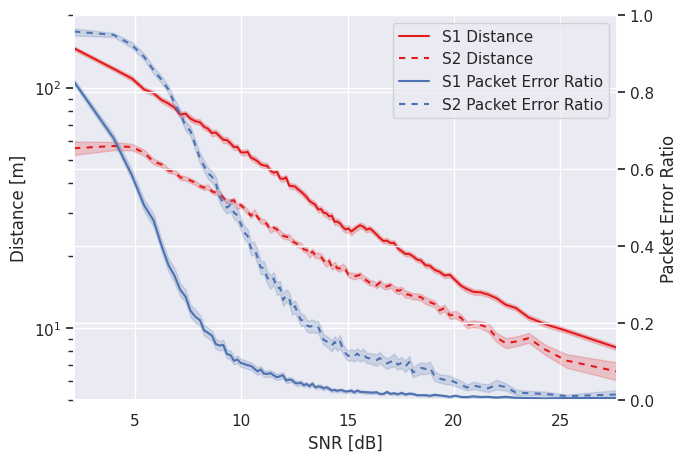

In [ ]:
f = plt.figure()

dist_lim = (5,200)
per_lim = (0, 1)
snr_lim = snrq_df['SNR'].min(), snrq_df['SNR'].max()

dashes = ("", (3, 3))

ax1 = plt.gca()
ax2 = plt.twinx()
perplot = sns.lineplot(snrq_df, x='SNR', y='Packet_error_ratio', legend=False, style="Scenario", dashes=dashes,
                       ax =ax2)
distplot = sns.lineplot(snrq_df, x='SNR', y='distance', style="Scenario", dashes=dashes, legend=False,
                        ax=ax1, color=sns.color_palette("Paired")[5])
distplot.set(yscale="log")

ax1.set_xlim(snr_lim)
ax1.set_ylim(dist_lim)
ax2.set_ylim(per_lim)


ax1.set_xlabel("SNR [dB]")
ax1.set_ylabel("Distance [m]")
ax2.set_ylabel("Packet Error Ratio")

lines = ax1.get_lines()[:2] + ax2.get_lines()[:2]
ax2.legend(lines, ["S1 Distance", "S2 Distance",
                   "S1 Packet Error Ratio", "S2 Packet Error Ratio"])
#plt.title(f"Scenario {scen}: PC{src} to PC{dst}")

plt.gcf().set_size_inches(7, 5)
plt.savefig("DistSnrPer.pdf", bbox_inches='tight')

#adding throughput,reliability,latency

In [ ]:
for i in plot_df['Scenario']:
  if i=="s1":
    plot_df['Throughput']=plot_df['Packet_transmission_rate_hz']*plot_df['Received Packets']*69*8
  else:
    plot_df['Throughput']=plot_df['Packet_transmission_rate_hz']*plot_df['Received Packets']*1000*8
plot_df['Reliability']= 1-plot_df['Packet_error_ratio']
#plot_df['latency']=plot_df['time_epoch']
#print(plot_df['latency'])

# modelling for Reliability

Random Forest Regreesion with validation

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error, median_absolute_error,mean_absolute_percentage_error

X = plot_df[['SNR', 'RSRP', 'RSSI', 'MCS', 'Received Packets', 'speed_kmh_source', 'speed_kmh_destination', 'distance', 'Packet_transmission_rate_hz', 'Sub_channels']]
y = plot_df['Packet_error_ratio']

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

# Initialize the Random Forest Regressor with optional hyperparameters
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=0)

# Train the model on the training set
rf_regressor.fit(X_train, y_train)

# Make predictions on the validation set
val_predictions = rf_regressor.predict(X_val)
mse = mean_squared_error(y_val, val_predictions)
rmse=np.sqrt(mse)
r2 = r2_score(y_val, val_predictions)
mae = mean_absolute_error(y_val, val_predictions)
mape=mean_absolute_percentage_error(y_val, val_predictions)
medae = median_absolute_error(y_val, val_predictions)
mae="{:.4f}".format(mae)
print(f"MAE:", {mae})
mape=mean_absolute_percentage_error(y_test, val_predictions)
mape="{:.4f}".format(mape)
print(f"MAPE:", {mape})
medae = median_absolute_error(y_test, val_predictions)
medae="{:.4f}".format(medae)
print(f"MedAE:", {medae})
mse="{:.4f}".format(mse)
print(f"MSE: {mse}")
rmse="{:.4f}".format(rmse)
print(f"RMSE: {rmse}")
print(f"R2 score: {r2}")

# Test the model on the testing set
test_predictions = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, test_predictions)
rmse=np.sqrt(mse)
r2 = r2_score(y_test, test_predictions)
# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, test_predictions)
mape=mean_absolute_percentage_error(y_test, test_predictions)
# Calculate MedAE (Median Absolute Error)
medae = median_absolute_error(y_test, test_predictions)
mae="{:.4f}".format(mae)
print(f"MAE:", {mae})
mape=mean_absolute_percentage_error(y_test, test_predictions)
mape="{:.4f}".format(mape)
print(f"MAPE:", {mape})
# Calculate MedAE (Median Absolute Error)
medae = median_absolute_error(y_test, test_predictions)
medae="{:.4f}".format(medae)
print(f"MedAE:", {medae})
mse="{:.4f}".format(mse)
print(f"MSE: {mse}")
rmse="{:.4f}".format(rmse)
print(f"RMSE: {rmse}")
print(f"R2 score: {r2}")

feature_importances = rf_regressor.feature_importances_
print("Feature importances:", feature_importances)
plot_df['Reliability_pred'] = 1-rf_regressor.predict(X)

MAE: {'0.0000'}
MAPE: {'329941980326791.6250'}
MedAE: {'0.1500'}
MSE: 0.0000
RMSE: 0.0000
R2 score: 0.9999999995423062
MAE: {'0.0000'}
MAPE: {'0.0000'}
MedAE: {'0.0000'}
MSE: 0.0000
RMSE: 0.0000
R2 score: 1.0
Feature importances: [6.93470335e-02 2.06124459e-15 1.97266813e-15 2.64394971e-02
 8.49462368e-01 1.06752884e-15 1.23946957e-15 2.00692106e-15
 2.54310534e-02 2.93200480e-02]


random forest

In [ ]:
plot_df['Reliability_pred']

timestamp
2021-06-22 09:51:48+02:00    0.00
2021-06-22 09:51:48+02:00    0.15
2021-06-22 09:51:49+02:00    0.05
2021-06-22 09:51:49+02:00    0.00
2021-06-22 09:51:50+02:00    0.20
                             ... 
2021-06-23 17:06:59+02:00    0.96
2021-06-23 17:07:00+02:00    0.58
2021-06-23 17:07:00+02:00    0.30
2021-06-23 17:07:00+02:00    0.86
2021-06-23 17:07:00+02:00    0.98
Name: test_predictions, Length: 167840, dtype: float64

Gradient Booster

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error, median_absolute_error,mean_absolute_percentage_error
X = plot_df[['SNR', 'RSRP', 'RSSI', 'MCS', 'Received Packets', 'speed_kmh_source', 'speed_kmh_destination', 'distance', 'Packet_transmission_rate_hz', 'Sub_channels']]
y = plot_df['Packet_error_ratio']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

xgbr = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Fit the model to the training data
xgbr.fit(X_train, y_train)

# Make predictions on the validation set
val_predictions = xgbr.predict(X_val)
mse = mean_squared_error(y_val, val_predictions)
rmse=np.sqrt(mse)
r2 = r2_score(y_val, val_predictions)
mae = mean_absolute_error(y_val, val_predictions)
mape=mean_absolute_percentage_error(y_val, val_predictions)
medae = median_absolute_error(y_val, val_predictions)
mae="{:.4f}".format(mae)
print(f"MAE:", {mae})
mape="{:.4f}".format(mape)
print(f"MAPE:", {mape})
medae="{:.4f}".format(medae)
print(f"MedAE:", {medae})
mse="{:.4f}".format(mse)
print(f"MSE: {mse}")
rmse="{:.4f}".format(rmse)
print(f"RMSE: {rmse}")
print(f"R2 score: {r2}")

#print("MAE:", mae)
#print("MAPE:", mape)
#print("MedAE:", medae)
#print(f"MSE: {mse}")
#print(f"RMSE: {rmse}")
#print(f"R2 score: {r2}\n")

# Make predictions on the test data
test_predictions = xgbr.predict(X_test)

# Evaluate the model's performance on the testing set
mse = mean_squared_error(y_test, test_predictions)
rmse=np.sqrt(mse)
r2 = r2_score(y_test, test_predictions)
mae = mean_absolute_error(y_test, test_predictions)
mae="{:.4f}".format(mae)
print(f"MAE:", {mae})
mape=mean_absolute_percentage_error(y_test, test_predictions)
mape="{:.4f}".format(mape)
print(f"MAPE:", {mape})
# Calculate MedAE (Median Absolute Error)
medae = median_absolute_error(y_test, test_predictions)
medae="{:.4f}".format(medae)
print(f"MedAE:", {medae})
mse="{:.4f}".format(mse)
print(f"MSE: {mse}")
rmse="{:.4f}".format(rmse)
print(f"RMSE: {rmse}")
print(f"R2 score: {r2}")

#print("MAE:", mae)
#mape=mean_absolute_percentage_error(y_test, test_predictions)
#print("MAPE:", mape)
# Calculate MedAE (Median Absolute Error)
#medae = median_absolute_error(y_test, test_predictions)
#print("MedAE:", medae)
#print(f"MSE: {mse}")
#print(f"RMSE: {rmse}")
#print(f"R2 score: {r2}")

MAE: {'0.0001'}
MAPE: {'5692946041.3681'}
MedAE: {'0.0000'}
MSE: 0.0000
RMSE: 0.0003
R2 score: 0.9999990378591351
MAE: {'0.0001'}
MAPE: {'8047971086.7319'}
MedAE: {'0.0000'}
MSE: 0.0000
RMSE: 0.0003
R2 score: 0.9999990656747371


linear regression

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error, median_absolute_error,mean_absolute_percentage_error

# Load your dataset
# Split the dataset into features (X) and target variable (y)
X = plot_df[['SNR', 'RSRP', 'RSSI', 'MCS', 'Received Packets', 'speed_kmh_source', 'speed_kmh_destination', 'distance', 'Packet_transmission_rate_hz', 'Sub_channels']]
y = plot_df['Packet_error_ratio']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)
LinReg = LinearRegression()

# Train the model on the training set
LinReg.fit(X_train, y_train)

# Make predictions on the validation set
val_predictions = LinReg.predict(X_val)
mse = mean_squared_error(y_val, val_predictions)
rmse=np.sqrt(mse)
r2 = r2_score(y_val, val_predictions)
mae = mean_absolute_error(y_val, val_predictions)
mape=mean_absolute_percentage_error(y_val, val_predictions)
medae = median_absolute_error(y_val, val_predictions)
print("MAE:", mae)
print("MAPE:", mape)
print("MedAE:", medae)
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 score: {r2}\n")

# Test the model on the testing set
test_predictions = LinReg.predict(X_test)

# Evaluate the model's performance on the testing set
mse = mean_squared_error(y_test, test_predictions)
rmse=np.sqrt(mse)
r2 = r2_score(y_test, test_predictions)
# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, test_predictions)
print("MAE:", mae)
mape=mean_absolute_percentage_error(y_test, test_predictions)
print("MAPE:", mape)
# Calculate MedAE (Median Absolute Error)
medae = median_absolute_error(y_test, test_predictions)
print("MedAE:", medae)
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 score: {r2}")


MAE: 0.03040723654502128
MAPE: 36148455989574.484
MedAE: 0.01731082611885329
MSE: 0.0029568277178169903
RMSE: 0.05437672036650418
R2 score: 0.965928777548725

MAE: 0.030253554181337464
MAPE: 36090872099719.42
MedAE: 0.017440345059956154
MSE: 0.002850867899888062
RMSE: 0.05339351926861594
R2 score: 0.9677780119129321


# Random forest analysis

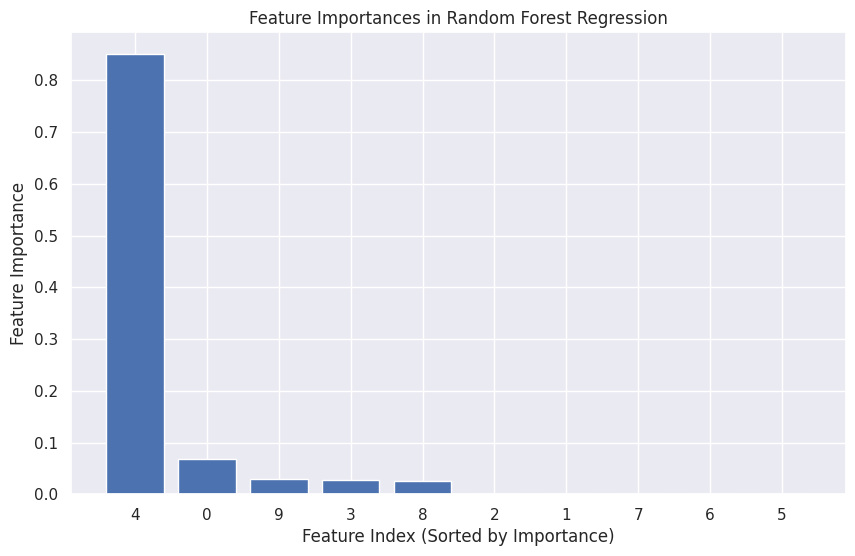

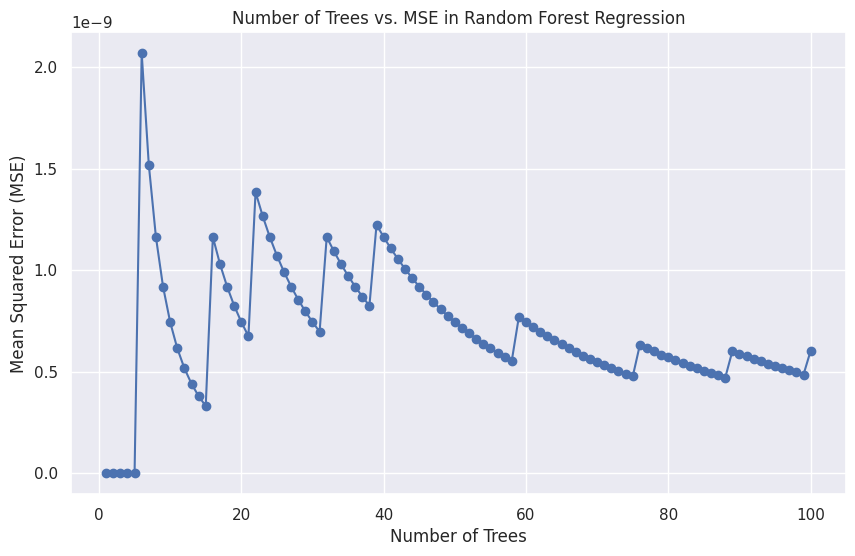

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X = plot_df[['SNR', 'RSRP', 'RSSI', 'MCS', 'Received Packets', 'speed_kmh_source', 'speed_kmh_destination', 'distance', 'Packet_transmission_rate_hz', 'Sub_channels']]
y = plot_df['Packet_error_ratio']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest regression model
n_estimators = 100  # You can adjust this number as needed
rf_regressor = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
rf_regressor.fit(X_train, y_train)

# Feature Importances
feature_importances = rf_regressor.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances[sorted_indices])
plt.xticks(range(X_train.shape[1]), sorted_indices)
plt.xlabel('Feature Index (Sorted by Importance)')
plt.ylabel('Feature Importance')
plt.title('Feature Importances in Random Forest Regression')
plt.show()

# Number of Trees vs. Mean Squared Error
mse_values = []
n_trees_range = range(1, n_estimators + 1)
for n_trees in n_trees_range:
    rf = RandomForestRegressor(n_estimators=n_trees, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

plt.figure(figsize=(10, 6))
plt.plot(n_trees_range, mse_values, marker='o')
plt.xlabel('Number of Trees')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Number of Trees vs. MSE in Random Forest Regression')
plt.grid(True)
plt.show()


# plotting the rf graphs

<Axes: xlabel='Reliability', ylabel='Reliability_pred'>

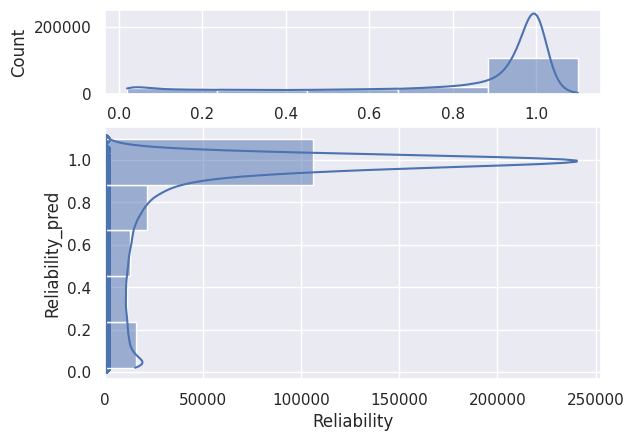

In [ ]:
f,(ax_hist,ax_scatter)=plt.subplots(2,gridspec_kw={"height_ratios":(.25,.75)})
sns.histplot(x=plot_df['Reliability'],kde=True,ax=ax_hist,bins=5)
sns.regplot(x=plot_df['Reliability'], y=plot_df['Reliability_pred'], marker='o',ax=ax_scatter)# label='Actual vs. Predicted')
sns.histplot(y=plot_df['Reliability'],kde=True,bins=5)

#PCA graph

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/misc.py:97: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


Explained Variance Ratio for PC1: 0.3962
Explained Variance Ratio for PC2: 0.3399
Explained Variance Ratio for PC3: 0.1344
Explained Variance Ratio for PC4: 0.0548
Explained Variance Ratio for PC5: 0.0452


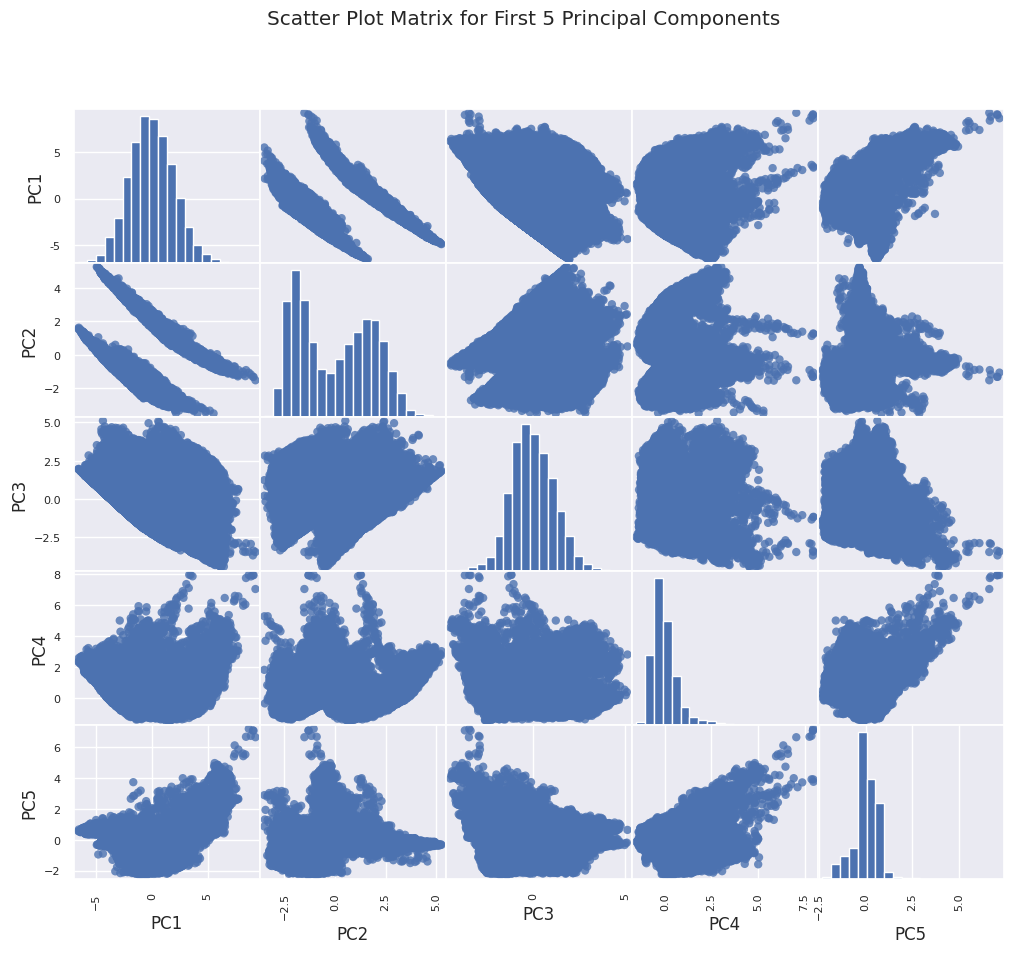

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
X = plot_df[
    [
        "SNR",
        "RSRP",
        "RSSI",
        "MCS",
        "Received Packets",
        "speed_kmh_source",
        "speed_kmh_destination",
        "distance",
        "Packet_transmission_rate_hz",
        "Sub_channels",
    ]
]
y = plot_df["Packet_error_ratio"]
# Standardize the features (mean=0, variance=1)
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Create a PCA object and specify the number of components
n_components = 5  # Specify 5 components
pca = PCA(n_components=n_components)

# Fit PCA on the standardized data
X_pca = pca.fit_transform(X_std)

# Create a DataFrame for the first five principal components
pca_df = pd.DataFrame(data=X_pca[:, :n_components], columns=[f'PC{i+1}' for i in range(n_components)])

# Add the target labels to the DataFrame
#pca_df['Target'] = y

# Create a scatter plot matrix for the first five principal components
pd.plotting.scatter_matrix(pca_df, figsize=(12, 10), marker='o', hist_kwds={'bins': 20}, alpha=0.8)

plt.suptitle(f'Scatter Plot Matrix for First {n_components} Principal Components')
explained_variance = pca.explained_variance_ratio_
for i, ratio in enumerate(explained_variance):
    print(f'Explained Variance Ratio for PC{i + 1}: {ratio:.4f}')
plt.show()


#TSNE graph


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
X = plot_df[
    [
        "SNR",
        "RSRP",
        "RSSI",
        "MCS",
        "Received Packets",
        "speed_kmh_source",
        "speed_kmh_destination",
        "distance",
        "Packet_transmission_rate_hz",
        "Sub_channels",
    ]
]
y = plot_df["Packet_error_ratio"]
#X = np.array(X)
# Reduce the dimensionality of the dataset to 5 components using t-SNE
tsne = TSNE(n_components=2, random_state=42, method='exact')
X_tsne = tsne.fit_transform(X)

# Create a scatter plot with colors based on the target values
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap=plt.cm.Spectral)

# Add colorbar
plt.colorbar(scatter)

# Set labels and title
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization with 5 Components')

# Show the plot
plt.show()


#MLP
An MLP is a feedforward
neural network that stacks together multiple layers of neurons
in a sequential architecture. It is a Deep Learning (DL) model
that has been successfully applied to regression problems with
labeled tabular datasets. Our MLP consists of four hidden
layers 256, 128, 64, and 32 neurons each and rectified linear
unit (ReLU) activation functions. It is trained with an Adam
optimizer and uses early stopping to counteract overfitting.
The model hyperparameters were tuned using [60] with 5-
fold cross-validation. The split by folds was used to split the
dataset into a train and validation set. We used the Mean
Absolute Error (MAE) as the cost function.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error, median_absolute_error

# Define the features (X) and the target variable (y)
X = plot_df[['SNR', 'RSRP', 'RSSI', 'MCS', 'Received Packets', 'speed_kmh_source', 'speed_kmh_destination', 'distance', 'Packet_transmission_rate_hz', 'Sub_channels']]
y = plot_df['Packet_error_ratio']

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

# Initialize the MLP Regressor with the specified architecture and hyperparameters
mlp_regressor = MLPRegressor(
    hidden_layer_sizes=(256, 128, 64, 32),  # Four hidden layers with the specified number of neurons
    activation='relu',  # Rectified Linear Unit (ReLU) activation function
    solver='adam',  # Adam optimizer
    early_stopping=True,  # Enable early stopping to prevent overfitting
    random_state=0
)

# Train the MLP model on the training set
mlp_regressor.fit(X_train, y_train)

# Make predictions on the validation set
val_predictions = mlp_regressor.predict(X_val)

# Evaluate the model on the validation set
mse = mean_squared_error(y_val, val_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, val_predictions)
mae = mean_absolute_error(y_val, val_predictions)
mape = mean_absolute_percentage_error(y_val, val_predictions)
medae = median_absolute_error(y_val, val_predictions)
mae="{:.4f}".format(mae)
print(f"MAE:", {mae})
mape=mean_absolute_percentage_error(y_test, test_predictions)
mape="{:.4f}".format(mape)
print(f"MAPE:", {mape})
# Calculate MedAE (Median Absolute Error)
medae = median_absolute_error(y_test, test_predictions)
medae="{:.4f}".format(medae)
print(f"MedAE:", {medae})
mse="{:.4f}".format(mse)
print(f"MSE: {mse}")
rmse="{:.4f}".format(rmse)
print(f"RMSE: {rmse}")
print(f"R2 score: {r2}")

# Print validation set metrics
#print("Validation Set Metrics:")
#print("MAE:", mae)
#print("MAPE:", mape)
#print("MedAE:", medae)
#print(f"MSE: {mse}")
#print(f"RMSE: {rmse}")
#print(f"R2 score: {r2}\n")

# Make predictions on the testing set
test_predictions = mlp_regressor.predict(X_test)

# Evaluate the model on the testing set
mse = mean_squared_error(y_test, test_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, test_predictions)
mae = mean_absolute_error(y_test, test_predictions)
mape = mean_absolute_percentage_error(y_test, test_predictions)
medae = median_absolute_error(y_test, test_predictions)
mae="{:.4f}".format(mae)
print(f"MAE:", {mae})
mape=mean_absolute_percentage_error(y_test, test_predictions)
mape="{:.4f}".format(mape)
print(f"MAPE:", {mape})
# Calculate MedAE (Median Absolute Error)
medae = median_absolute_error(y_test, test_predictions)
medae="{:.4f}".format(medae)
print(f"MedAE:", {medae})
mse="{:.4f}".format(mse)
print(f"MSE: {mse}")
rmse="{:.4f}".format(rmse)
print(f"RMSE: {rmse}")
print(f"R2 score: {r2}")

# Print testing set metrics
#print("Testing Set Metrics:")
#print("MAE:", mae)
#print("MAPE:", mape)
#print("MedAE:", medae)
#print(f"MSE: {mse}")
#print(f"RMSE: {rmse}")
#print(f"R2 score: {r2}")


Validation Set Metrics:
MAE: 0.004552390900733294
MAPE: 4909021041331.165
MedAE: 0.0033731407096075344
MSE: 5.0434263619917615e-05
RMSE: 0.007101708500066559
R2 score: 0.9994188511543618

Testing Set Metrics:
MAE: 0.004482629694977201
MAPE: 4915382881838.077
MedAE: 0.0033041197551854987
MSE: 4.438280591786124e-05
RMSE: 0.006662042173227458
R2 score: 0.999498362500903


mlp with loop


In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create empty lists to store metrics and combination names
mse_values = []
rmse_values = []
r2_values = []
mae_values = []
combination_names = []

# Define the selected features
selected_features = plot_df[['SNR', 'RSRP', 'RSSI', 'MCS', 'Received Packets', 'speed_kmh_source', 'speed_kmh_destination', 'distance', 'Packet_transmission_rate_hz', 'Sub_channels']]

# Create a list of column names
column_names = selected_features.columns.tolist()

# Define MLP hyperparameters
mlp_regressor = MLPRegressor(hidden_layer_sizes=(256, 128, 64, 32), activation='relu', solver='adam', early_stopping=True, random_state=0)

for i in range(len(column_names) - 2):
    for j in range(i + 1, len(column_names) - 1):
        for k in range(j + 1, len(column_names)):
            combination_name = f"{column_names[i]}, {column_names[j]}, {column_names[k]}"
            print(f"The MLP regression between {combination_name} and packet_error_ratio is\n")
            x = selected_features[[column_names[i], column_names[j], column_names[k]]]
            y = plot_df['Packet_error_ratio']
            X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

            # Train the MLP Regressor
            mlp_regressor.fit(X_train, y_train)

            # Make predictions
            y_pred = mlp_regressor.predict(X_test)

            # Evaluate the model
            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)
            r2 = r2_score(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)
            lin_test1 = mlp_regressor.score(X_test, y_test)
            lin_train1 = mlp_regressor.score(X_train, y_train)

            print(f"scores for test and train {lin_test1, lin_train1}")
            print(f"Mean Squared Error: {mse}")
            print(f"Root Mean Squared Error: {rmse}")
            print(f"R-squared: {r2}")
            print(f"Mean Absolute Error: {mae}")

            mse_values.append(mse)
            rmse_values.append(rmse)
            r2_values.append(r2)
            mae_values.append(mae)
            combination_names.append(combination_name)
            print("*******\n\n\n")

# Create a DataFrame to store the metrics
metrics_df = pd.DataFrame({
    'Combination': combination_names,
    'MSE': mse_values,
    'RMSE': rmse_values,
    'R-squared': r2_values,
    'MAE': mae_values
})

# You can now analyze and visualize the metrics in the 'metrics_df' DataFrame.
# For example, you can sort and plot the metrics for different combinations.

# Sort the DataFrame by R-squared values
metrics_df.sort_values(by='R-squared', ascending=False, inplace=True)

# Plot the metrics for different combinations
plt.figure(figsize=(12, 6))
plt.bar(metrics_df['Combination'], metrics_df['R-squared'], color='r', label='R-squared')
plt.bar(metrics_df['Combination'], metrics_df['RMSE'], color='g', label='RMSE')
plt.bar(metrics_df['Combination'], metrics_df['MSE'], color='b', label='MSE')
plt.bar(metrics_df['Combination'], metrics_df['MAE'], color='y', label='MAE')
plt.xlabel('Combination Names')
plt.ylabel('Metric Value')
plt.title('Metrics for Different Feature Combinations')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


The MLP regression between SNR, RSRP, RSSI and packet_error_ratio is

scores for test and train (0.6608218157817523, 0.6650943080592494)
Mean Squared Error: 0.02944154799840278
Root Mean Squared Error: 0.17158539564427613
R-squared: 0.6608218157817523
Mean Absolute Error: 0.109074282686123
*******



The MLP regression between SNR, RSRP, MCS and packet_error_ratio is

scores for test and train (0.6598292301589315, 0.6637834113637227)
Mean Squared Error: 0.029527707010439948
Root Mean Squared Error: 0.17183627966887535
R-squared: 0.6598292301589315
Mean Absolute Error: 0.10888822676714666
*******



The MLP regression between SNR, RSRP, Received Packets and packet_error_ratio is



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


KeyboardInterrupt: ignored

MLP

Additional hidden layer: hidden_layer_sizes=(256, 128, 64, 32, 16)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error, median_absolute_error

# Define the features (X) and the target variable (y)
X = plot_df[['SNR', 'RSRP', 'RSSI', 'MCS', 'Received Packets', 'speed_kmh_source', 'speed_kmh_destination', 'distance', 'Packet_transmission_rate_hz', 'Sub_channels']]
y = plot_df['Packet_error_ratio']

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

# Define the architecture of the MLP with different layers and neurons
mlp_regressor = MLPRegressor(
    hidden_layer_sizes=(256, 128, 64, 32, 16),  # Customize the layers and neurons as needed
    activation='relu',  # Rectified Linear Unit (ReLU) activation function
    solver='adam',  # Adam optimizer
    early_stopping=True,  # Enable early stopping to prevent overfitting
    random_state=0
)

# Train the MLP model on the training set
mlp_regressor.fit(X_train, y_train)

# Make predictions on the validation set
val_predictions = mlp_regressor.predict(X_val)

# Evaluate the model on the validation set
mse = mean_squared_error(y_val, val_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, val_predictions)
mae = mean_absolute_error(y_val, val_predictions)
mape = mean_absolute_percentage_error(y_val, val_predictions)
medae = median_absolute_error(y_val, val_predictions)

# Print validation set metrics
print("Validation Set Metrics:")

mae="{:.4f}".format(mae)
print(f"MAE:", {mae})
mape="{:.4f}".format(mape)
print(f"MAPE:", {mape})
medae="{:.4f}".format(medae)
print(f"MedAE:", {medae})
mse="{:.4f}".format(mse)
print(f"MSE: {mse}")
rmse="{:.4f}".format(rmse)
print(f"RMSE: {rmse}")
print(f"R2 score: {r2}")

#print("MAE:", mae)
#print("MAPE:", mape)
#print("MedAE:", medae)
#print(f"MSE: {mse}")
#print(f"RMSE: {rmse}")
#print(f"R2 score: {r2}\n")

# Make predictions on the testing set
test_predictions = mlp_regressor.predict(X_test)

# Evaluate the model on the testing set
mse = mean_squared_error(y_test, test_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, test_predictions)
mae = mean_absolute_error(y_test, test_predictions)
mape = mean_absolute_percentage_error(y_test, test_predictions)
medae = median_absolute_error(y_test, test_predictions)

# Print testing set metrics

print("Testing Set Metrics:")
mae="{:.4f}".format(mae)
print(f"MAE:", {mae})
mape="{:.4f}".format(mape)
print(f"MAPE:", {mape})
medae="{:.4f}".format(medae)
print(f"MedAE:", {medae})
mse="{:.4f}".format(mse)
print(f"MSE: {mse}")
rmse="{:.4f}".format(rmse)
print(f"RMSE: {rmse}")
print(f"R2 score: {r2}")
#print("MAE:", mae)
#print("MAPE:", mape)
#print("MedAE:", medae)
#print(f"MSE: {mse}")
#print(f"RMSE: {rmse}")
#print(f"R2 score: {r2}")


Validation Set Metrics:
MAE: {'0.0016'}
MAPE: {'2147580710954.1836'}
MedAE: {'0.0012'}
MSE: 0.0000
RMSE: 0.0022
R2 score: 0.9999438093079073
MAE: {'0.0016'}
MAPE: {'2157928271179.4260'}
MedAE: {'0.0012'}
MSE: 0.0000
RMSE: 0.0023
R2 score: 0.9999403075221897
Testing Set Metrics:


diff comb of MLP

The code below iterates through different combinations of MLP architectures (number of layers and neurons) and learning rates, training and evaluating the model for each combination on the validation set. You can adjust the architectures and learning_rates lists to include other combinations or hyperparameters of interest.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error, median_absolute_error

# Define the features (X) and the target variable (y)
X = plot_df[['SNR', 'RSRP', 'RSSI', 'MCS', 'Received Packets', 'speed_kmh_source', 'speed_kmh_destination', 'distance', 'Packet_transmission_rate_hz', 'Sub_channels']]
y = plot_df['Packet_error_ratio']

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

# Define different architectures and hyperparameters
architectures = [
    (256, 128, 64, 32),  # 4 hidden layers with 256, 128, 64, and 32 neurons each
    (128, 64, 32),      # 3 hidden layers with 128, 64, and 32 neurons each
    (512, 256),         # 2 hidden layers with 512 and 256 neurons
]

learning_rates = [0.001, 0.01, 0.1]  # Different learning rates to try

# Iterate through different architectures and learning rates
for architecture in architectures:
    for learning_rate in learning_rates:
        # Initialize the MLP Regressor with the current architecture and learning rate
        mlp_regressor = MLPRegressor(
            hidden_layer_sizes=architecture,
            activation='relu',     # Rectified Linear Unit (ReLU) activation function
            solver='adam',         # Adam optimizer
            early_stopping=True,   # Enable early stopping to prevent overfitting
            random_state=0,
            max_iter=500,          # Maximum number of iterations
            alpha=0.0001,          # L2 regularization strength
            batch_size='auto',     # Batch size for training
            learning_rate_init=learning_rate,  # Initial learning rate
        )

        # Train the MLP model on the training set
        mlp_regressor.fit(X_train, y_train)

        # Make predictions on the validation set
        val_predictions = mlp_regressor.predict(X_val)

        # Evaluate the model on the validation set
        mse = mean_squared_error(y_val, val_predictions)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_val, val_predictions)
        mae = mean_absolute_error(y_val, val_predictions)
        mape = mean_absolute_percentage_error(y_val, val_predictions)
        medae = median_absolute_error(y_val, val_predictions)

        # Print validation set metrics for the current combination
        print(f"Architecture: {architecture}, Learning Rate: {learning_rate}")
        print("Validation Set Metrics:")
        print("MAE:", mae)
        print("MAPE:", mape)
        print("MedAE:", medae)
        print(f"MSE: {mse}")
        print(f"RMSE: {rmse}")
        print(f"R2 score: {r2}\n")

# You can further customize the hyperparameters and combinations based on your needs.


Architecture: (256, 128, 64, 32), Learning Rate: 0.001
Validation Set Metrics:
MAE: 0.004552390900733294
MAPE: 4909021041331.165
MedAE: 0.0033731407096075344
MSE: 5.0434263619917615e-05
RMSE: 0.007101708500066559
R2 score: 0.9994188511543618

Architecture: (256, 128, 64, 32), Learning Rate: 0.01
Validation Set Metrics:
MAE: 0.0014690007511370016
MAPE: 2253686729629.326
MedAE: 0.0011599002752559345
MSE: 6.016701764145792e-06
RMSE: 0.002452896606900868
R2 score: 0.9999306701628256

Architecture: (256, 128, 64, 32), Learning Rate: 0.1
Validation Set Metrics:
MAE: 0.2343729907755416
MAPE: 317640518452985.3
MedAE: 0.19751639929535203
MSE: 0.08679298265329169
RMSE: 0.2946064877990498
R2 score: -0.00010663501666519082

Architecture: (128, 64, 32), Learning Rate: 0.001
Validation Set Metrics:
MAE: 0.002241267180734227
MAPE: 3231497691473.91
MedAE: 0.0018788305217135228
MSE: 9.291170373264992e-06
RMSE: 0.0030481421182853323
R2 score: 0.9998929387969706

Architecture: (128, 64, 32), Learning Rat

#hyper parameter


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
X = plot_df[['SNR', 'RSRP', 'RSSI', 'MCS', 'Received Packets', 'speed_kmh_source', 'speed_kmh_destination', 'distance', 'Packet_transmission_rate_hz', 'Sub_channels']]
y = plot_df['Packet_error_ratio']

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=0)

# Define a range of hyperparameters to search through
param_grid = {
    'n_estimators': [25,50,100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train a Random Forest Regressor with the best hyperparameters on the training data
best_rf_regressor = RandomForestRegressor(random_state=42, **best_params)
best_rf_regressor.fit(X_train, y_train)
print(best_params)
# Make predictions on the validation set with the tuned model
val_predictions = best_rf_regressor.predict(X_val)

# Evaluate the model's performance on the validation set
mse = mean_squared_error(y_val, val_predictions)
r2 = r2_score(y_val, val_predictions)

print(f"Mean Squared Error on Validation Set: {mse}")
print(f"R-squared Score on Validation Set: {r2}")


In [ ]:
plot_df['Throughput']

timestamp
2021-06-22 09:51:48+02:00     3200000
2021-06-22 09:51:48+02:00     2720000
2021-06-22 09:51:49+02:00     3040000
2021-06-22 09:51:49+02:00     3200000
2021-06-22 09:51:50+02:00     2560000
                               ...   
2021-06-23 17:06:59+02:00      800000
2021-06-23 17:07:00+02:00     8400000
2021-06-23 17:07:00+02:00    14000000
2021-06-23 17:07:00+02:00     2800000
2021-06-23 17:07:00+02:00      400000
Name: Throughput, Length: 167840, dtype: int64

# correlation bw all features

In [ ]:
corr = plot_df.corr(method = 'pearson')
corr

<ipython-input-20-74bb5cf1261b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = plot_df.corr(method = 'pearson')


,Source,Destination,time_epoch,SNR,RSRP,RSSI,NOISE POWER,RX_GAIN,SubFrame_NUMBER,SubFrame_LENGHT,...,visibility_destination,Traffic_Jam_Factor_destination,Traffic_Distance_destination,Pos_in_Ref_Round_destination,syncref_source,syncref_destination,distance,Packet_transmission_rate_hz,Sub_channels,Packet_error_ratio
Source,1.000000,-0.459240,-0.013488,0.202595,0.239859,0.258653,0.050486,0.209842,-0.000773,-0.027013,...,NaN,-0.001264,0.033090,0.008688,NaN,NaN,-0.072599,0.017952,0.017952,-0.072816
Destination,-0.459240,1.000000,0.008812,0.081532,-0.025957,-0.046451,-0.049870,-0.372165,0.000186,0.007719,...,NaN,-0.017212,0.001823,0.004229,NaN,NaN,-0.065589,-0.012703,-0.012703,-0.057982
time_epoch,-0.013488,0.008812,1.000000,0.025958,-0.117182,-0.036037,-0.096165,-0.216178,0.000134,-0.006891,...,NaN,0.096160,-0.010357,0.070350,NaN,NaN,-0.064269,0.242456,0.242456,0.054226
SNR,0.202595,0.081532,0.025958,1.000000,0.812547,0.686379,0.035571,-0.012560,-0.002711,-0.018230,...,NaN,-0.090935,0.009383,-0.076902,NaN,NaN,-0.651558,-0.243606,-0.243606,-0.635516
RSRP,0.239859,-0.025957,-0.117182,0.812547,1.000000,0.915551,0.392928,0.438348,-0.003666,-0.021554,...,NaN,-0.089289,0.039313,-0.066606,NaN,NaN,-0.548640,-0.200408,-0.200408,-0.520887
RSSI,0.258653,-0.046451,-0.036037,0.686379,0.915551,1.000000,0.417154,0.461151,-0.003992,-0.017774,...,NaN,-0.006248,0.044120,-0.047247,NaN,NaN,-0.562880,0.151361,0.151361,-0.346478
NOISE POWER,0.050486,-0.049870,-0.096165,0.035571,0.392928,0.417154,1.000000,0.590575,0.000582,-0.003732,...,NaN,-0.024648,-0.005545,0.059712,NaN,NaN,-0.022682,0.021197,0.021197,-0.008383
RX_GAIN,0.209842,-0.372165,-0.216178,-0.012560,0.438348,0.461151,0.590575,1.000000,-0.000528,-0.002310,...,NaN,-0.020541,0.089157,-0.008604,NaN,NaN,0.051966,-0.023548,-0.023548,-0.028289
SubFrame_NUMBER,-0.000773,0.000186,0.000134,-0.002711,-0.003666,-0.003992,0.000582,-0.000528,1.000000,0.004213,...,NaN,0.000483,-0.001096,0.003288,NaN,NaN,-0.000288,0.000880,0.000880,0.004718
SubFrame_LENGHT,-0.027013,0.007719,-0.006891,-0.018230,-0.021554,-0.017774,-0.003732,-0.002310,0.004213,1.000000,...,NaN,0.014830,-0.003021,-0.011873,NaN,NaN,-0.003380,0.053878,0.053878,0.026416


 heat map of corr of all features


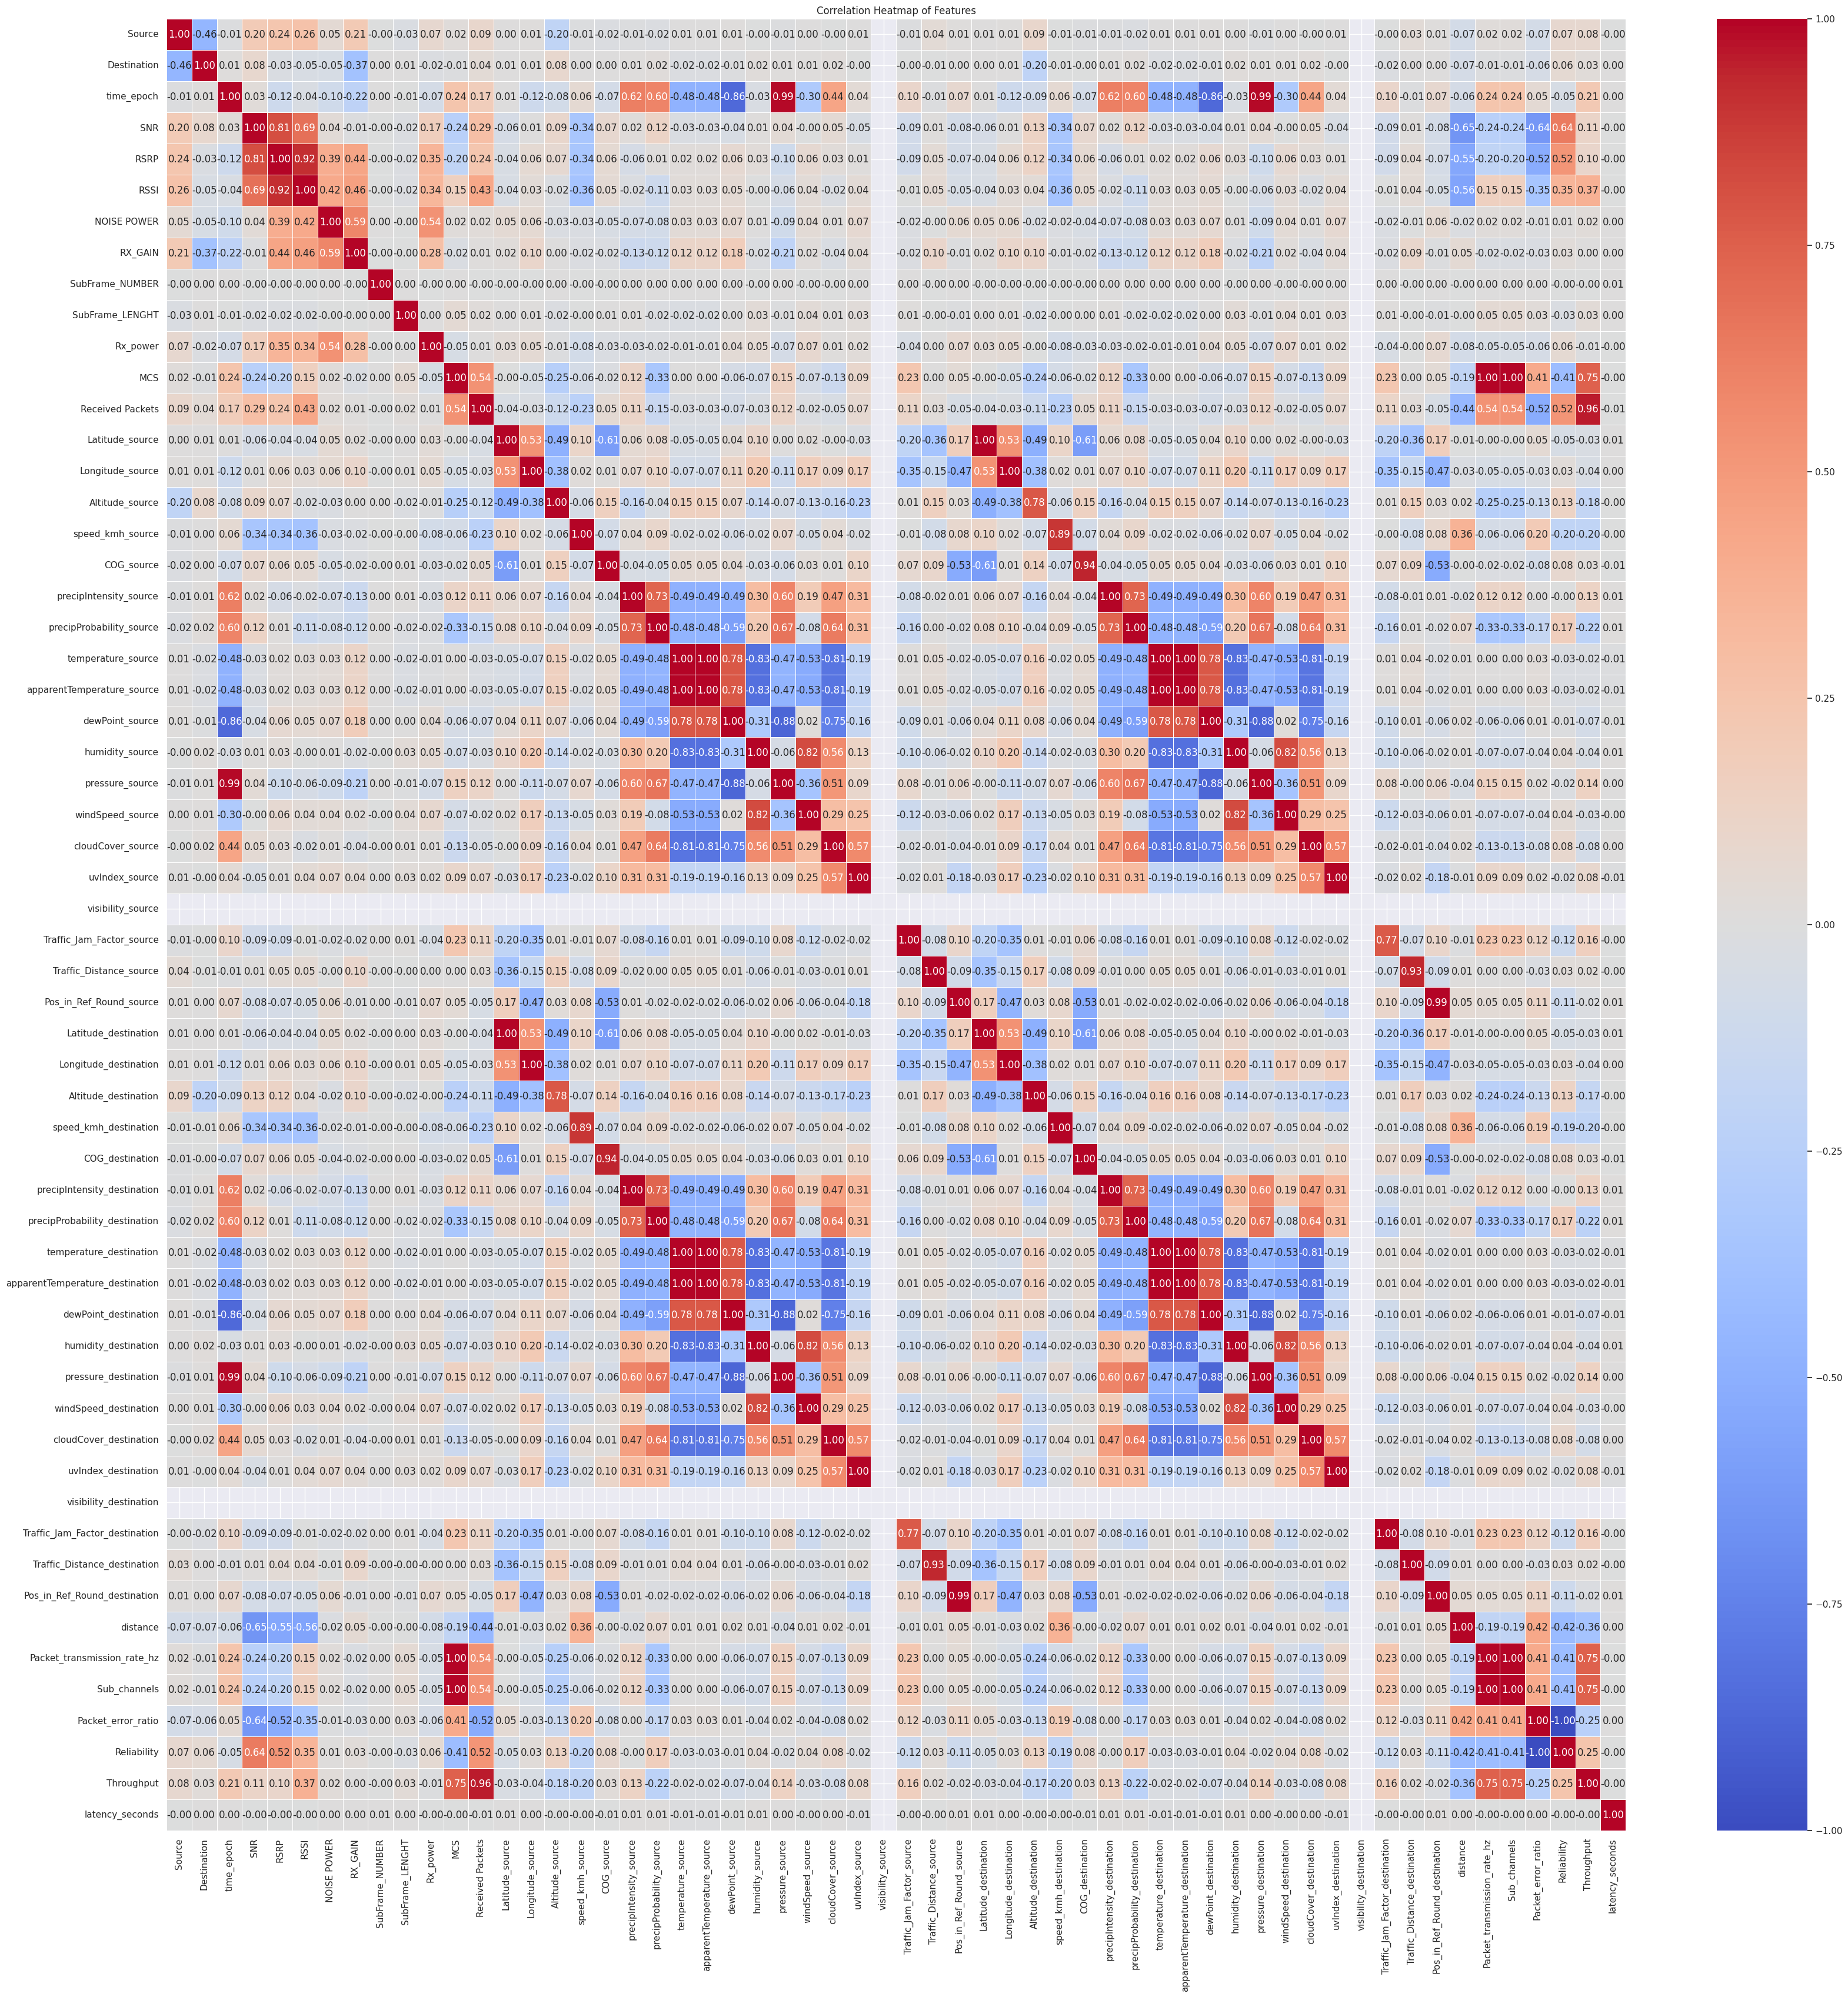

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a subset DataFrame with only the selected features
selected_features=['Source', 'Destination','time_epoch', 'SNR', 'RSRP','RSSI', 'NOISE POWER', 'RX_GAIN', 'SubFrame_NUMBER', 'SubFrame_LENGHT',
       'Rx_power', 'MCS', 'Received Packets','Latitude_source', 'Longitude_source', 'Altitude_source','speed_kmh_source', 'COG_source', 'precipIntensity_source',
       'precipProbability_source', 'temperature_source',
       'apparentTemperature_source', 'dewPoint_source', 'humidity_source',
       'pressure_source', 'windSpeed_source', 'cloudCover_source',
       'uvIndex_source', 'visibility_source', 'Traffic_Jam_Factor_source','Traffic_Distance_source',
       'Pos_in_Ref_Round_source','Latitude_destination', 'Longitude_destination',
       'Altitude_destination', 'speed_kmh_destination', 'COG_destination',
       'precipIntensity_destination', 'precipProbability_destination',
       'temperature_destination', 'apparentTemperature_destination',
       'dewPoint_destination', 'humidity_destination', 'pressure_destination',
       'windSpeed_destination', 'cloudCover_destination',
       'uvIndex_destination', 'visibility_destination',
       'Traffic_Jam_Factor_destination','Traffic_Distance_destination', 'Pos_in_Ref_Round_destination',
       'distance', 'Packet_transmission_rate_hz',
       'Sub_channels','Packet_error_ratio','Reliability','Throughput','latency_seconds']
subset_df = plot_df[selected_features]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(40,40))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()


In [ ]:
plot_df.columns


Index(['Source', 'Destination', 'Scenario', 'time_epoch', 'SNR', 'RSRP',
       'RSSI', 'NOISE POWER', 'RX_GAIN', 'SubFrame_NUMBER', 'SubFrame_LENGHT',
       'Rx_power', 'MCS', 'Received Packets', 'ts_gps_source',
       'Latitude_source', 'Longitude_source', 'Altitude_source',
       'speed_kmh_source', 'COG_source', 'precipIntensity_source',
       'precipProbability_source', 'temperature_source',
       'apparentTemperature_source', 'dewPoint_source', 'humidity_source',
       'pressure_source', 'windSpeed_source', 'cloudCover_source',
       'uvIndex_source', 'visibility_source', 'Traffic_Jam_Factor_source',
       'Traffic_Street_Name_source', 'Traffic_Distance_source',
       'Pos_in_Ref_Round_source', 'device_source', 'area_source',
       'ts_gps_destination', 'Latitude_destination', 'Longitude_destination',
       'Altitude_destination', 'speed_kmh_destination', 'COG_destination',
       'precipIntensity_destination', 'precipProbability_destination',
       'temperature_desti

# random forest regressor

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
plt.figsize=(100,60)
# Create empty lists to store metrics and combination names
mse_values = []
rmse_values = []
r2_values = []
combination_names = []
selected_features = plot_df[['SNR', 'RSRP', 'RSSI', 'MCS', 'Received Packets', 'speed_kmh_source', 'speed_kmh_destination', 'distance', 'Packet_transmission_rate_hz', 'Sub_channels']]
# Create a list of column names
column_names = selected_features.columns.tolist()
for i in range(len(column_names) - 2):
    for j in range(i + 1, len(column_names) - 1):
        for k in range(j + 1, len(column_names)):
            combination_name = f"{column_names[i]}, {column_names[j]}, {column_names[k]}"
            print(f"The Random forest regression between {combination_name} and packet_error_ratio is\n")
            x = selected_features[[column_names[i], column_names[j], column_names[k]]]
            y = plot_df['Packet_error_ratio']
            X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
            # Create and train a Random Forest Regressor
            rf_regressor = RandomForestRegressor(n_estimators=100, random_state=0)
            rf_regressor.fit(X_train, y_train)
            # Make predictions
            y_pred = rf_regressor.predict(X_test)
            # Evaluate the model
            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)
            r2 = r2_score(y_test, y_pred)
            lin_test1=rf_regressor.score(X_test,y_test)
            lin_train1=rf_regressor.score(X_train,y_train)
            print(f"scores for test and train {lin_test1,lin_train1}")
            print(f"Mean Squared Error: {mse}")
            print(f"Root Mean Squared Error: {rmse}")
            print(f"R-squared: {r2}")
            mse_values.append(mse)
            rmse_values.append(rmse)
            r2_values.append(r2)
            combination_names.append(combination_name)
            print("*******\n\n\n")
#fig, ax = plt.subplots(figsize=(60, 40))
#sns.barplot(x=combination_names, y=r2_values, color='r', ax=ax, label='R-squared')
#sns.barplot(x=combination_names, y=rmse_values, color='g', ax=ax, label='RMSE')
#sns.barplot(x=combination_names, y=mse_values, color='b', ax=ax, label='MSE')

#ax.set_xlabel('Combination Names')
#ax.set_ylabel('Metric Value')
#ax.set_title('Metrics for Different Feature Combinations')
#ax.legend(loc='upper right')
#plt.xticks(rotation=90, fontsize=30)  # Adjust the fontsize as needed
#plt.tight_layout()
#plt.show()
plot_df.plot(x="combination_names", y=["r2_values", "rmse_values","mse_values"], kind="bar")


The Random forest regression between SNR, RSRP, RSSI and packet_error_ratio is



KeyboardInterrupt: ignored

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create empty lists to store metrics and combination names
mse_values = []
rmse_values = []
r2_values = []
mae_values = []
combination_names = []

# Define the selected features
selected_features = plot_df[['SNR', 'RSRP', 'RSSI', 'MCS', 'Received Packets', 'speed_kmh_source', 'speed_kmh_destination', 'distance', 'Packet_transmission_rate_hz', 'Sub_channels']]

# Create a list of column names
column_names = selected_features.columns.tolist()

# Define MLP hyperparameters
mlp_regressor = MLPRegressor(hidden_layer_sizes=(256, 128, 64, 32), activation='relu', solver='adam', early_stopping=True, random_state=0)

for i in range(len(column_names) - 2):
    for j in range(i + 1, len(column_names) - 1):
        for k in range(j + 1, len(column_names)):
            combination_name = f"{column_names[i]}, {column_names[j]}, {column_names[k]}"
            print(f"The MLP regression between {combination_name} and packet_error_ratio is\n")
            x = selected_features[[column_names[i], column_names[j], column_names[k]]]
            y = plot_df['Packet_error_ratio']
            X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

            # Train the MLP Regressor
            mlp_regressor.fit(X_train, y_train)

            # Make predictions
            y_pred = mlp_regressor.predict(X_test)

            # Evaluate the model
            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)
            r2 = r2_score(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)
            lin_test1 = mlp_regressor.score(X_test, y_test)
            lin_train1 = mlp_regressor.score(X_train, y_train)

            print(f"scores for test and train {lin_test1, lin_train1}")
            print(f"Mean Squared Error: {mse}")
            print(f"Root Mean Squared Error: {rmse}")
            print(f"R-squared: {r2}")
            print(f"Mean Absolute Error: {mae}")

            mse_values.append(mse)
            rmse_values.append(rmse)
            r2_values.append(r2)
            mae_values.append(mae)
            combination_names.append(combination_name)
            print("*******\n\n\n")

# Create a DataFrame to store the metrics
metrics_df = pd.DataFrame({
    'Combination': combination_names,
    'MSE': mse_values,
    'RMSE': rmse_values,
    'R-squared': r2_values,
    'MAE': mae_values
})

# You can now analyze and visualize the metrics in the 'metrics_df' DataFrame.
# For example, you can sort and plot the metrics for different combinations.

# Sort the DataFrame by R-squared values
metrics_df.sort_values(by='R-squared', ascending=False, inplace=True)

# Plot the metrics for different combinations
plt.figure(figsize=(12, 6))
plt.bar(metrics_df['Combination'], metrics_df['R-squared'], color='r', label='R-squared')
plt.bar(metrics_df['Combination'], metrics_df['RMSE'], color='g', label='RMSE')
plt.bar(metrics_df['Combination'], metrics_df['MSE'], color='b', label='MSE')
plt.bar(metrics_df['Combination'], metrics_df['MAE'], color='y', label='MAE')
plt.xlabel('Combination Names')
plt.ylabel('Metric Value')
plt.title('Metrics for Different Feature Combinations')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


#modelling for throuhput

Random forest

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error, median_absolute_error,mean_absolute_percentage_error

X = plot_df[['time_epoch','RSSI', 'MCS', 'speed_kmh_source', 'speed_kmh_destination','precipProbability_source','precipProbability_destination','distance', 'Sub_channels','Packet_error_ratio']]
y = plot_df['Throughput']

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

# Initialize the Random Forest Regressor with optional hyperparameters
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=0)
print(rf_regressor)
# Train the model on the training set
rf_regressor.fit(X_train, y_train)

# Make predictions on the validation set
val_predictions = rf_regressor.predict(X_val)
mse = mean_squared_error(y_val, val_predictions)
rmse=np.sqrt(mse)
r2 = r2_score(y_val, val_predictions)
mae = mean_absolute_error(y_val, val_predictions)
mape=mean_absolute_percentage_error(y_val, val_predictions)
medae = median_absolute_error(y_val, val_predictions)
print("Validation Set Metrics:")

mae="{:.4f}".format(mae)
print(f"MAE:", {mae})
mape="{:.4f}".format(mape)
print(f"MAPE:", {mape})
medae="{:.4f}".format(medae)
print(f"MedAE:", {medae})
mse="{:.4f}".format(mse)
print(f"MSE: {mse}")
rmse="{:.4f}".format(rmse)
print(f"RMSE: {rmse}")
print(f"R2 score: {r2}")

#print("MAE:", mae)
#print("MAPE:", mape)
#print("MedAE:", medae)
#print(f"MSE: {mse}")
#print(f"RMSE: {rmse}")
#print(f"R2 score: {r2}\n")

# Test the model on the testing set
test_predictions = rf_regressor.predict(X_test)
plot_df['throughput_pred'] = rf_regressor.predict(X)
mse = mean_squared_error(y_test, test_predictions)
rmse=np.sqrt(mse)
r2 = r2_score(y_test, test_predictions)
# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, test_predictions)
mape=mean_absolute_percentage_error(y_test, test_predictions)
# Calculate MedAE (Median Absolute Error)
medae = median_absolute_error(y_test, test_predictions)
print("TEST Set Metrics:")

mae="{:.4f}".format(mae)
print(f"\nMAE:", {mae})
mape="{:.4f}".format(mape)
print(f"MAPE:", {mape})
medae="{:.4f}".format(medae)
print(f"MedAE:", {medae})
mse="{:.4f}".format(mse)
print(f"MSE: {mse}")
rmse="{:.4f}".format(rmse)
print(f"RMSE: {rmse}")
print(f"R2 score: {r2}\n")
feature_importances = rf_regressor.feature_importances_
print("Feature importances:", feature_importances)

#print("MAE:", mae)
#print("MAPE:", mape)
#print("MedAE:", medae)
#print(f"MSE: {mse}")
#print(f"RMSE: {rmse}")
#print(f"R2 score: {r2}")

RandomForestRegressor(random_state=0)
Validation Set Metrics:
MAE: {'0.0000'}
MAPE: {'0.0000'}
MedAE: {'0.0000'}
MSE: 0.0000
RMSE: 0.0000
R2 score: 1.0
TEST Set Metrics:

MAE: {'0.0000'}
MAPE: {'0.0000'}
MedAE: {'0.0000'}
MSE: 0.0000
RMSE: 0.0000
R2 score: 1.0

Feature importances: [0.         0.         0.27207395 0.         0.         0.
 0.         0.         0.28355949 0.44436656]


In [ ]:
plot_df['throughput_pred']

timestamp
2021-06-22 09:51:48+02:00     3200000.0
2021-06-22 09:51:48+02:00     2720000.0
2021-06-22 09:51:49+02:00     3040000.0
2021-06-22 09:51:49+02:00     3200000.0
2021-06-22 09:51:50+02:00     2560000.0
                                ...    
2021-06-23 17:06:59+02:00      800000.0
2021-06-23 17:07:00+02:00     8400000.0
2021-06-23 17:07:00+02:00    14000000.0
2021-06-23 17:07:00+02:00     2800000.0
2021-06-23 17:07:00+02:00      400000.0
Name: throughput_pred, Length: 167840, dtype: float64

gradient booster

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error, median_absolute_error,mean_absolute_percentage_error
X = plot_df[['time_epoch','RSSI', 'MCS', 'speed_kmh_source', 'speed_kmh_destination','precipProbability_source','precipProbability_destination','distance', 'Sub_channels','Packet_error_ratio']]
y = plot_df['Throughput']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

xgbr = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Fit the model to the training data
xgbr.fit(X_train, y_train)

# Make predictions on the validation set
val_predictions = xgbr.predict(X_val)
mse = mean_squared_error(y_val, val_predictions)
rmse=np.sqrt(mse)
r2 = r2_score(y_val, val_predictions)
mae = mean_absolute_error(y_val, val_predictions)
mape=mean_absolute_percentage_error(y_val, val_predictions)
medae = median_absolute_error(y_val, val_predictions)
mae="{:.4f}".format(mae)
print(f"MAE:", {mae})
mape="{:.4f}".format(mape)
print(f"MAPE:", {mape})
medae="{:.4f}".format(medae)
print(f"MedAE:", {medae})
mse="{:.4f}".format(mse)
print(f"MSE: {mse}")
rmse="{:.4f}".format(rmse)
print(f"RMSE: {rmse}")
print(f"R2 score: {r2}")

# Make predictions on the test data
test_predictions = xgbr.predict(X_test)

# Evaluate the model's performance on the testing set
mse = mean_squared_error(y_test, test_predictions)
rmse=np.sqrt(mse)
r2 = r2_score(y_test, test_predictions)
mae = mean_absolute_error(y_test, test_predictions)
mae="{:.4f}".format(mae)
print(f"MAE:", {mae})
mape=mean_absolute_percentage_error(y_test, test_predictions)
mape="{:.4f}".format(mape)
print(f"MAPE:", {mape})
# Calculate MedAE (Median Absolute Error)
medae = median_absolute_error(y_test, test_predictions)
medae="{:.4f}".format(medae)
print(f"MedAE:", {medae})
mse="{:.4f}".format(mse)
print(f"MSE: {mse}")
rmse="{:.4f}".format(rmse)
print(f"RMSE: {rmse}")
print(f"R2 score: {r2}")


MAE: {'0.7552'}
MAPE: {'0.0000'}
MedAE: {'0.2500'}
MSE: 1.1261
RMSE: 1.0612
R2 score: 0.9999999999999777
MAE: {'0.7502'}
MAPE: {'0.0000'}
MedAE: {'0.2500'}
MSE: 1.1157
RMSE: 1.0563
R2 score: 0.9999999999999778


Linear Regression

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error, median_absolute_error,mean_absolute_percentage_error

# Load your dataset
# Split the dataset into features (X) and target variable (y)
X = plot_df[['time_epoch','RSSI', 'MCS', 'speed_kmh_source', 'speed_kmh_destination','precipProbability_source','precipProbability_destination','distance', 'Sub_channels','Packet_error_ratio']]
y = plot_df['Throughput']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)
LinReg = LinearRegression()

# Train the model on the training set
LinReg.fit(X_train, y_train)

# Make predictions on the validation set
val_predictions = LinReg.predict(X_val)
mse = mean_squared_error(y_val, val_predictions)
rmse=np.sqrt(mse)
r2 = r2_score(y_val, val_predictions)
mae = mean_absolute_error(y_val, val_predictions)
mape=mean_absolute_percentage_error(y_val, val_predictions)
medae = median_absolute_error(y_val, val_predictions)
print("MAE:", mae)
print("MAPE:", mape)
print("MedAE:", medae)
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 score: {r2}\n")

# Test the model on the testing set
test_predictions = LinReg.predict(X_test)

# Evaluate the model's performance on the testing set
mse = mean_squared_error(y_test, test_predictions)
rmse=np.sqrt(mse)
r2 = r2_score(y_test, test_predictions)
# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, test_predictions)
print("MAE:", mae)
mape=mean_absolute_percentage_error(y_test, test_predictions)
print("MAPE:", mape)
# Calculate MedAE (Median Absolute Error)
medae = median_absolute_error(y_test, test_predictions)
print("MedAE:", medae)
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 score: {r2}")


MAE: 1051304.5140431048
MAPE: 0.7110202861152879
MedAE: 751255.1830015182
MSE: 2661318561630.8013
RMSE: 1631354.8239517978
R2 score: 0.9471914303939671

MAE: 1051240.3111619197
MAPE: 0.7047987233574062
MedAE: 752901.9845290184
MSE: 2631750086974.4365
RMSE: 1622266.9592192392
R2 score: 0.947593244751363


MLP

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error, median_absolute_error

# Define the features (X) and the target variable (y)
X = plot_df[['time_epoch','RSSI', 'MCS', 'speed_kmh_source', 'speed_kmh_destination','precipProbability_source','precipProbability_destination','distance', 'Sub_channels','Packet_error_ratio']]
y = plot_df['Throughput']

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

# Define the architecture of the MLP with different layers and neurons
mlp_regressor = MLPRegressor(
    hidden_layer_sizes=(256, 128, 64, 32, 16),  # Customize the layers and neurons as needed
    activation='relu',  # Rectified Linear Unit (ReLU) activation function
    solver='adam',  # Adam optimizer
    early_stopping=True,  # Enable early stopping to prevent overfitting
    random_state=0
)

# Train the MLP model on the training set
mlp_regressor.fit(X_train, y_train)

# Make predictions on the validation set
val_predictions = mlp_regressor.predict(X_val)

# Evaluate the model on the validation set
mse = mean_squared_error(y_val, val_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, val_predictions)
mae = mean_absolute_error(y_val, val_predictions)
mape = mean_absolute_percentage_error(y_val, val_predictions)
medae = median_absolute_error(y_val, val_predictions)

# Print validation set metrics
print("Validation Set Metrics:")

mae="{:.4f}".format(mae)
print(f"MAE:", {mae})
mape="{:.4f}".format(mape)
print(f"MAPE:", {mape})
medae="{:.4f}".format(medae)
print(f"MedAE:", {medae})
mse="{:.4f}".format(mse)
print(f"MSE: {mse}")
rmse="{:.4f}".format(rmse)
print(f"RMSE: {rmse}")
print(f"R2 score: {r2}")

# Make predictions on the testing set
test_predictions = mlp_regressor.predict(X_test)

# Evaluate the model on the testing set
mse = mean_squared_error(y_test, test_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, test_predictions)
mae = mean_absolute_error(y_test, test_predictions)
mape = mean_absolute_percentage_error(y_test, test_predictions)
medae = median_absolute_error(y_test, test_predictions)

# Print testing set metrics

print("Testing Set Metrics:")
mae="{:.4f}".format(mae)
print(f"MAE:", {mae})
mape="{:.4f}".format(mape)
print(f"MAPE:", {mape})
medae="{:.4f}".format(medae)
print(f"MedAE:", {medae})
mse="{:.4f}".format(mse)
print(f"MSE: {mse}")
rmse="{:.4f}".format(rmse)
print(f"RMSE: {rmse}")
print(f"R2 score: {r2}")

Validation Set Metrics:
MAE: {'6464858.8260'}
MAPE: {'1.9970'}
MedAE: {'5091102.0753'}
MSE: 50395459558121.9922
RMSE: 7098975.9514
R2 score: 2.4152417509304414e-06
Testing Set Metrics:
MAE: {'6453200.5717'}
MAPE: {'2.0128'}
MedAE: {'5091101.3883'}
MSE: 50223356828974.1016
RMSE: 7086843.9258
R2 score: -0.00011136396575928131


#modelling of latency

Random forest

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error, median_absolute_error,mean_absolute_percentage_error

X = plot_df[['time_epoch','RSSI', 'MCS', 'speed_kmh_source', 'speed_kmh_destination','precipProbability_source','precipProbability_destination','distance', 'Sub_channels','Packet_error_ratio']]
y = plot_df['latency_seconds']

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

# Initialize the Random Forest Regressor with optional hyperparameters
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=0)
print(rf_regressor)
# Train the model on the training set
rf_regressor.fit(X_train, y_train)

# Make predictions on the validation set
val_predictions = rf_regressor.predict(X_val)
mse = mean_squared_error(y_val, val_predictions)
rmse=np.sqrt(mse)
r2 = r2_score(y_val, val_predictions)
mae = mean_absolute_error(y_val, val_predictions)
mape=mean_absolute_percentage_error(y_val, val_predictions)
medae = median_absolute_error(y_val, val_predictions)
print("Validation Set Metrics:")

mae="{:.4f}".format(mae)
print(f"MAE:", {mae})
mape="{:.4f}".format(mape)
print(f"MAPE:", {mape})
medae="{:.4f}".format(medae)
print(f"MedAE:", {medae})
mse="{:.4f}".format(mse)
print(f"MSE: {mse}")
rmse="{:.4f}".format(rmse)
print(f"RMSE: {rmse}")
print(f"R2 score: {r2}")
# Test the model on the testing set
test_predictions = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, test_predictions)
rmse=np.sqrt(mse)
r2 = r2_score(y_test, test_predictions)
# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, test_predictions)
mape=mean_absolute_percentage_error(y_test, test_predictions)
# Calculate MedAE (Median Absolute Error)
medae = median_absolute_error(y_test, test_predictions)
print("TEST Set Metrics:")

mae="{:.4f}".format(mae)
print(f"\nMAE:", {mae})
mape="{:.4f}".format(mape)
print(f"MAPE:", {mape})
medae="{:.4f}".format(medae)
print(f"MedAE:", {medae})
mse="{:.4f}".format(mse)
print(f"MSE: {mse}")
rmse="{:.4f}".format(rmse)
print(f"RMSE: {rmse}")
print(f"R2 score: {r2}")


gradient booster

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error, median_absolute_error,mean_absolute_percentage_error
X = plot_df[['time_epoch','RSSI', 'MCS', 'speed_kmh_source', 'speed_kmh_destination','precipProbability_source','precipProbability_destination','distance', 'Sub_channels','Packet_error_ratio']]
y = plot_df['Throughput']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

xgbr = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Fit the model to the training data
xgbr.fit(X_train, y_train)

# Make predictions on the validation set
val_predictions = xgbr.predict(X_val)
mse = mean_squared_error(y_val, val_predictions)
rmse=np.sqrt(mse)
r2 = r2_score(y_val, val_predictions)
mae = mean_absolute_error(y_val, val_predictions)
mape=mean_absolute_percentage_error(y_val, val_predictions)
medae = median_absolute_error(y_val, val_predictions)
mae="{:.4f}".format(mae)
print(f"MAE:", {mae})
mape="{:.4f}".format(mape)
print(f"MAPE:", {mape})
medae="{:.4f}".format(medae)
print(f"MedAE:", {medae})
mse="{:.4f}".format(mse)
print(f"MSE: {mse}")
rmse="{:.4f}".format(rmse)
print(f"RMSE: {rmse}")
print(f"R2 score: {r2}")
# Make predictions on the test data
test_predictions = xgbr.predict(X_test)

# Evaluate the model's performance on the testing set
mse = mean_squared_error(y_test, test_predictions)
rmse=np.sqrt(mse)
r2 = r2_score(y_test, test_predictions)
mae = mean_absolute_error(y_test, test_predictions)
mae="{:.4f}".format(mae)
print(f"MAE:", {mae})
mape=mean_absolute_percentage_error(y_test, test_predictions)
mape="{:.4f}".format(mape)
print(f"MAPE:", {mape})
# Calculate MedAE (Median Absolute Error)
medae = median_absolute_error(y_test, test_predictions)
medae="{:.4f}".format(medae)
print(f"MedAE:", {medae})
mse="{:.4f}".format(mse)
print(f"MSE: {mse}")
rmse="{:.4f}".format(rmse)
print(f"RMSE: {rmse}")
print(f"R2 score: {r2}")


MAE: {'0.0001'}
MAPE: {'5692946041.3681'}
MedAE: {'0.0000'}
MSE: 0.0000
RMSE: 0.0003
R2 score: 0.9999990378591351
MAE: {'0.0001'}
MAPE: {'8047971086.7319'}
MedAE: {'0.0000'}
MSE: 0.0000
RMSE: 0.0003
R2 score: 0.9999990656747371


Linear Regression

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error, median_absolute_error,mean_absolute_percentage_error

# Load your dataset
# Split the dataset into features (X) and target variable (y)
X = plot_df[['time_epoch','RSSI', 'MCS', 'speed_kmh_source', 'speed_kmh_destination','precipProbability_source','precipProbability_destination','distance', 'Sub_channels','Packet_error_ratio']]
y = plot_df['Throughput']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)
LinReg = LinearRegression()

# Train the model on the training set
LinReg.fit(X_train, y_train)

# Make predictions on the validation set
val_predictions = LinReg.predict(X_val)
mse = mean_squared_error(y_val, val_predictions)
rmse=np.sqrt(mse)
r2 = r2_score(y_val, val_predictions)
mae = mean_absolute_error(y_val, val_predictions)
mape=mean_absolute_percentage_error(y_val, val_predictions)
medae = median_absolute_error(y_val, val_predictions)
print("MAE:", mae)
print("MAPE:", mape)
print("MedAE:", medae)
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 score: {r2}\n")

# Test the model on the testing set
test_predictions = LinReg.predict(X_test)

# Evaluate the model's performance on the testing set
mse = mean_squared_error(y_test, test_predictions)
rmse=np.sqrt(mse)
r2 = r2_score(y_test, test_predictions)
# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, test_predictions)
print("MAE:", mae)
mape=mean_absolute_percentage_error(y_test, test_predictions)
print("MAPE:", mape)
# Calculate MedAE (Median Absolute Error)
medae = median_absolute_error(y_test, test_predictions)
print("MedAE:", medae)
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 score: {r2}")


MAE: 0.03040723654502128
MAPE: 36148455989574.484
MedAE: 0.01731082611885329
MSE: 0.0029568277178169903
RMSE: 0.05437672036650418
R2 score: 0.965928777548725

MAE: 0.030253554181337464
MAPE: 36090872099719.42
MedAE: 0.017440345059956154
MSE: 0.002850867899888062
RMSE: 0.05339351926861594
R2 score: 0.9677780119129321


MLP

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error, median_absolute_error

# Define the features (X) and the target variable (y)
X = plot_df[['time_epoch','RSSI', 'MCS', 'speed_kmh_source', 'speed_kmh_destination','precipProbability_source','precipProbability_destination','distance', 'Sub_channels','Packet_error_ratio']]
y = plot_df['Throughput']

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

# Define the architecture of the MLP with different layers and neurons
mlp_regressor = MLPRegressor(
    hidden_layer_sizes=(256, 128, 64, 32, 16),  # Customize the layers and neurons as needed
    activation='relu',  # Rectified Linear Unit (ReLU) activation function
    solver='adam',  # Adam optimizer
    early_stopping=True,  # Enable early stopping to prevent overfitting
    random_state=0
)

# Train the MLP model on the training set
mlp_regressor.fit(X_train, y_train)

# Make predictions on the validation set
val_predictions = mlp_regressor.predict(X_val)

# Evaluate the model on the validation set
mse = mean_squared_error(y_val, val_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, val_predictions)
mae = mean_absolute_error(y_val, val_predictions)
mape = mean_absolute_percentage_error(y_val, val_predictions)
medae = median_absolute_error(y_val, val_predictions)

# Print validation set metrics
print("Validation Set Metrics:")

mae="{:.4f}".format(mae)
print(f"MAE:", {mae})
mape="{:.4f}".format(mape)
print(f"MAPE:", {mape})
medae="{:.4f}".format(medae)
print(f"MedAE:", {medae})
mse="{:.4f}".format(mse)
print(f"MSE: {mse}")
rmse="{:.4f}".format(rmse)
print(f"RMSE: {rmse}")
print(f"R2 score: {r2}")
# Make predictions on the testing set
test_predictions = mlp_regressor.predict(X_test)

# Evaluate the model on the testing set
mse = mean_squared_error(y_test, test_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, test_predictions)
mae = mean_absolute_error(y_test, test_predictions)
mape = mean_absolute_percentage_error(y_test, test_predictions)
medae = median_absolute_error(y_test, test_predictions)

# Print testing set metrics

print("Testing Set Metrics:")
mae="{:.4f}".format(mae)
print(f"MAE:", {mae})
mape="{:.4f}".format(mape)
print(f"MAPE:", {mape})
medae="{:.4f}".format(medae)
print(f"MedAE:", {medae})
mse="{:.4f}".format(mse)
print(f"MSE: {mse}")
rmse="{:.4f}".format(rmse)
print(f"RMSE: {rmse}")
print(f"R2 score: {r2}")


Validation Set Metrics:
MAE: {'0.0016'}
MAPE: {'2147580710954.1836'}
MedAE: {'0.0012'}
MSE: 0.0000
RMSE: 0.0022
R2 score: 0.9999438093079073
MAE: {'0.0016'}
MAPE: {'2157928271179.4260'}
MedAE: {'0.0012'}
MSE: 0.0000
RMSE: 0.0023
R2 score: 0.9999403075221897
Testing Set Metrics:


# optimization


##*Convex Optimization:*
#Code Explanation

Importing Libraries: The code starts by importing the cvxpy library, which is used for convex optimization problems.

Defining QoS Metrics and Weights: A dictionary called QoS_metrics is defined to represent various QoS metrics such as "Latency," "Throughput," and "Reliability." Each metric is associated with a decision variable created using cp.Variable(nonneg=True). These variables will be optimized to achieve desired QoS levels.

Defining the Weighted QoS Objective: The code introduces another decision variable, weights, representing the importance or weight assigned to each QoS metric. The overall QoS objective is then formulated as a maximization problem (cp.Maximize). It aims to maximize the weighted sum of QoS metrics using dot products between weights and the QoS metric variables.

Resource and QoS Constraints: The script defines constraints that reflect resource limitations and QoS requirements. For instance, it sets up constraints like bandwidth_constraint and power_constraint that ensure resource allocations (e.g., throughput, reliability) do not exceed maximum values. Similarly, QoS constraints like latency_constraint and throughput_constraint specify desired QoS thresholds.

Predicted Packet Error Rate (PER) Calculation: The code calculates the predicted Packet Error Rate (PER) using a machine learning model (Random Forest) and assigns it to predicted_PER_calculation.

Constraints for Predicted PER and Reliability: Two constraints are established. predicted_PER_constraint ensures that the predicted PER matches the calculated value, while predicted_RELIABILITY_constraint computes reliability as 1 - predicted PER and checks that the predicted reliability aligns with the calculated value.

Additional Constraints: The script allows for additional constraints to be defined and added to the constraints list. These constraints can be tailored to specific problem requirements.

Creating the Optimization Problem: Using cp.Problem, the optimization problem is constructed by combining the QoS objective and all defined constraints.

Solving the Problem: The optimization problem is solved with problem.solve(). The code checks the status of the solution, and if it's optimal (cp.OPTIMAL), it extracts the optimized weights, QoS metric values, and the overall QoS score.

Displaying Results or Handling Non-Convergence: In case the optimization problem doesn't converge to an optimal solution, the code communicates that. However, if it does converge, it prints out the optimized weights, QoS metric values, and the overall QoS score, providing insights into the optimal resource allocation strategy.

This code provides a framework for systematically optimizing QoS metrics while respecting resource constraints and utilizing machine learning predictions. It's a valuable tool for solving complex optimization problems in the context of QoS management.







In [ ]:
import cvxpy as cp

# Define QoS metrics
QoS_metrics = {
    "Latency": cp.Variable(nonneg=True),
    "Throughput": cp.Variable(nonneg=True),
    "Reliability": cp.Variable(nonneg=True),
    # Add more QoS metrics as needed
}

# Define the weighted QoS objective
weights = cp.Variable(len(QoS_metrics), nonneg=True)
QoS_objective = cp.Maximize(weights @ cp.hstack([QoS_metrics[metric] for metric in QoS_metrics]))

# Define resource constraints (modify as per your problem)
# Example resource constraints:
# bandwidth_constraint, power_constraint, sub_channels_constraint, etc.
bandwidth_constraint = QoS_metrics["Throughput"] <= max_bandwidth
power_constraint = QoS_metrics["Reliability"] <= max_power
sub_channels_constraint = QoS_metrics["Throughput"] + QoS_metrics["Latency"] <= max_sub_channels

# Define QoS constraints (modify as per your problem)
# Example QoS constraints:
# latency_constraint, throughput_constraint, etc.
latency_constraint = QoS_metrics["Latency"] <= max_latency
throughput_constraint = QoS_metrics["Throughput"] >= min_throughput

# Define the constraint involving predicted PER using the ML model (Random Forest)
# Assuming predicted_PER is related to Reliability as 1 - PER
predicted_PER_calculation = f(SNR, RSRP, RSSI, MCS, Received_Packets, speed_source,
                               speed_destination, distance, Packet_Transmission_Rate_Hz, Sub_Channels)

# Define the constraint that Predicted PER is equal to the calculated value
predicted_PER_constraint = (predicted_PER_variable == predicted_PER_calculation)

# Define the constraint for Reliability as 1 - Predicted PER
predicted_RELIABILITY_calculation = 1 - predicted_PER_calculation
predicted_RELIABILITY_constraint = (QoS_metrics["Reliability"] == predicted_RELIABILITY_calculation)

# Define additional constraints as needed
constraints = [
    # Example constraint: QoS_metrics["Latency"] + QoS_metrics["Throughput"] <= 1 (total allocation <= 1)
    QoS_metrics["Latency"] + QoS_metrics["Throughput"] + QoS_metrics["Reliability"] <= 1,
    # Add more constraints as per your problem
    predicted_PER_constraint,
    predicted_RELIABILITY_constraint,  # Use the reliability constraint
    bandwidth_constraint,
    power_constraint,
    sub_channels_constraint,
    latency_constraint,
    throughput_constraint,
]

# Create the problem
problem = cp.Problem(QoS_objective, constraints)

# Solve the problem
problem.solve()

# Check the solution status
if problem.status == cp.OPTIMAL:
    # Extract the optimized weights and QoS metric values
    optimized_weights = weights.value
    optimized_metrics = {metric: metric.value for metric in QoS_metrics.values()}
    optimized_QoS = QoS_objective.value
    print("Optimized Weights:", optimized_weights)
    print("Optimized QoS Metrics:", optimized_metrics)
    print("Optimized Overall QoS:", optimized_QoS)
else:
    print("Optimization problem did not converge to an optimal solution.")


In [ ]:
import cvxpy as cp
for i in range(5):
  # Known QoS metrics values
  throughput_value = plot_df['Throughput'].iloc[i]  # Replace with actual value
  reliability_value = plot_df['Reliability'].iloc[i]  # Replace with actual value
  #latency_value =   # Replace with actual value
  # Define weights as variables
  weights = {
      "Throughput": cp.Variable(nonneg=True),
      "Reliability": cp.Variable(nonneg=True),
      #"Latency": cp.Variable(nonneg=True),
  }

  # Define the weighted QoS objective to maximize QoS
  QoS_objective = cp.Maximize(
      weights["Throughput"] * throughput_value +
      weights["Reliability"] * reliability_value # +
      #weights["Latency"] * latency_value
  )

  # Define constraints (if any, e.g., sum of weights equals 1)
  constraints = [
      cp.sum(list(weights.values())) == 1,  # Weights should sum to 1
      weights.values()>=0,
      plot_df['Reliability_pred']==plot_df['Reliability'],
      plot_df['throughput_pred']==plot_df['Throughput']

      #predicted_PER_constraint,
      #predicted_RELIABILITY_constraint,  # Use the reliability constraint
      #bandwidth_constraint,
      #power_constraint,
      #sub_channels_constraint,
      #latency_constraint,
      #throughput_constraint,
  ]

  # Create the problem
  problem = cp.Problem(QoS_objective, constraints)

  # Solve the problem
  problem.solve()

  # Check the solution status
  if problem.status == cp.OPTIMAL:
      # Extract the optimized weights
      optimized_weights = {metric: weight.value for metric, weight in weights.items()}
      optimized_QoS = QoS_objective.value
      print("Optimized Weights:", optimized_weights)
      print("Optimized Overall QoS:", optimized_QoS)
  else:
      print("Optimization problem did not converge to an optimal solution.")


TypeError: ignored

In [ ]:
import cvxpy as cp
for i in range(5):
    x1 = plot_df['Throughput'].iloc[i]
    x2 = plot_df['Reliability'].iloc[i]
    # Define the weights
    a = cp.Variable(2, nonneg=True)
    # Define the weighted QoS objective to maximize QoS
    QoS_objective = cp.Maximize(a[0] * x1 + a[1] * x2)
    constraints = [
        a[0] >= 0,
        a[0] <=1,
        a[1]<=1,
        a[1] >= 0,
        cp.sum(a) == 1
       # plot_df['Reliability_pred'] <= x2,
       # plot_df['throughput_pred'] <= x1
    ]
    problem = cp.Problem(QoS_objective, constraints)
    problem.solve()
    # Check the results
    if problem.status == cp.OPTIMAL:
        optimized_weights = {metric: round(weight.value,4) for metric, weight in zip(["Throughput", "Reliability"], a)}
        optimal_objective_value = problem.value
        print("\nOptimal Coefficients:", optimized_weights)
        print("Optimal Objective Value:", optimal_objective_value)
    else:
        print("Optimization problem did not converge.")



Optimal Coefficients: {'Throughput': 1.0, 'Reliability': 0.0}
Optimal Objective Value: 2719999.9999867193

Optimal Coefficients: {'Throughput': 1.0, 'Reliability': 0.0}
Optimal Objective Value: 3199999.9999856083

Optimal Coefficients: {'Throughput': 1.0, 'Reliability': 0.0}
Optimal Objective Value: 3199999.9999856083

Optimal Coefficients: {'Throughput': 1.0, 'Reliability': 0.0}
Optimal Objective Value: 3039999.999985948

Optimal Coefficients: {'Throughput': 1.0, 'Reliability': 0.0}
Optimal Objective Value: 2719999.9999867193


#Monte Carlo Simulation

In [ ]:
import random, pylab

#set line width
pylab.rcParams['lines.linewidth'] = 4
#set font size for titles
pylab.rcParams['axes.titlesize'] = 20
#set font size for labels on axes
pylab.rcParams['axes.labelsize'] = 20
#set size of numbers on x-axis
pylab.rcParams['xtick.labelsize'] = 16
#set size of numbers on y-axis
pylab.rcParams['ytick.labelsize'] = 16
#set size of ticks on x-axis
pylab.rcParams['xtick.major.size'] = 7
#set size of ticks on y-axis
pylab.rcParams['ytick.major.size'] = 7
#set size of markers, e.g., circles representing points
#set numpoints for legend
pylab.rcParams['legend.numpoints'] = 1

class FairRoulette():
    def __init__(self):
        self.pockets = []
        for i in range(1,37):
            self.pockets.append(i)
        self.ball = None
        self.pocketOdds = len(self.pockets) - 1
    def spin(self):
        self.ball = random.choice(self.pockets)
    def betPocket(self, pocket, amt):
        if str(pocket) == str(self.ball):
            return amt*self.pocketOdds
        else: return -amt
    def __str__(self):
        return 'Fair Roulette'

def playRoulette(game, numSpins, pocket, bet, toPrint):
    totPocket = 0
    for i in range(numSpins):
        game.spin()
        totPocket += game.betPocket(pocket, bet)
    if toPrint:
        print(numSpins, 'spins of', game)
        print('Expected return betting', pocket, '=',\
              str(100*totPocket/numSpins) + '%\n')
    return (totPocket/numSpins)

random.seed(0)
game = FairRoulette()
for numSpins in (100, 1000000):
    for i in range(3):
        playRoulette(game, numSpins, 2, 1, True)

class EuRoulette(FairRoulette):
    def __init__(self):
        FairRoulette.__init__(self)
        self.pockets.append('0')
    def __str__(self):
        return 'European Roulette'

class AmRoulette(EuRoulette):
    def __init__(self):
        EuRoulette.__init__(self)
        self.pockets.append('00')
    def __str__(self):
        return 'American Roulette'

def findPocketReturn(game, numTrials, trialSize, toPrint):
    pocketReturns = []
    for t in range(numTrials):
        trialVals = playRoulette(game, trialSize, 2, 1, toPrint)
        pocketReturns.append(trialVals)
    return pocketReturns

random.seed(0)
numTrials = 20
resultDict = {}
games = (FairRoulette, EuRoulette, AmRoulette)
for G in games:
    resultDict[G().__str__()] = []
for numSpins in (1000, 10000, 100000, 1000000):
    print('\nSimulate', numTrials, 'trials of',
          numSpins, 'spins each')
    for G in games:
        pocketReturns = findPocketReturn(G(), numTrials,
                                         numSpins, False)
        expReturn = 100*sum(pocketReturns)/len(pocketReturns)
        print('Exp. return for', G(), '=',
             str(round(expReturn, 4)) + '%')

def getMeanAndStd(X):
    mean = sum(X)/float(len(X))
    tot = 0.0
    for x in X:
        tot += (x - mean)**2
    std = (tot/len(X))**0.5
    return mean, std


100 spins of Fair Roulette
Expected return betting 2 = -100.0%

100 spins of Fair Roulette
Expected return betting 2 = 44.0%

100 spins of Fair Roulette
Expected return betting 2 = -28.0%

1000000 spins of Fair Roulette
Expected return betting 2 = -0.046%

1000000 spins of Fair Roulette
Expected return betting 2 = 0.602%

1000000 spins of Fair Roulette
Expected return betting 2 = 0.7964%


Simulate 20 trials of 1000 spins each
Exp. return for Fair Roulette = 6.56%
Exp. return for European Roulette = -2.26%
Exp. return for American Roulette = -8.92%

Simulate 20 trials of 10000 spins each
Exp. return for Fair Roulette = -1.234%
Exp. return for European Roulette = -4.168%
Exp. return for American Roulette = -5.752%

Simulate 20 trials of 100000 spins each
Exp. return for Fair Roulette = 0.8144%
Exp. return for European Roulette = -2.6506%
Exp. return for American Roulette = -5.113%

Simulate 20 trials of 1000000 spins each
Exp. return for Fair Roulette = -0.0723%
Exp. return for European

# graphs for ppt

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Generate some example data for regression
X = plot_df[['SNR', 'RSRP', 'RSSI', 'MCS', 'Received Packets', 'speed_kmh_source', 'speed_kmh_destination', 'distance', 'Packet_transmission_rate_hz', 'Sub_channels']]
y = plot_df['Packet_error_ratio']

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

# Initialize the Random Forest Regressor with optional hyperparameters
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=0)

# Train the model on the training set
rf_regressor.fit(X_train, y_train)

# Make predictions on the validation set
val_predictions = rf_regressor.predict(X_val)
# Make predictions on the test data
# Calculate the Mean Squared Error and R-squared (R2) score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Create a scatter plot for actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', marker='o', label='Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs. Predicted Values (MSE={mse:.2f}, R2={r2:.2f})')

# Create a curve for Random Forest predictions
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_range_pred = rf_model.predict(X_range)
plt.plot(X_range, y_range_pred, c='red', label='Random Forest Curve')

plt.legend()
plt.grid(True)
plt.show()


#........


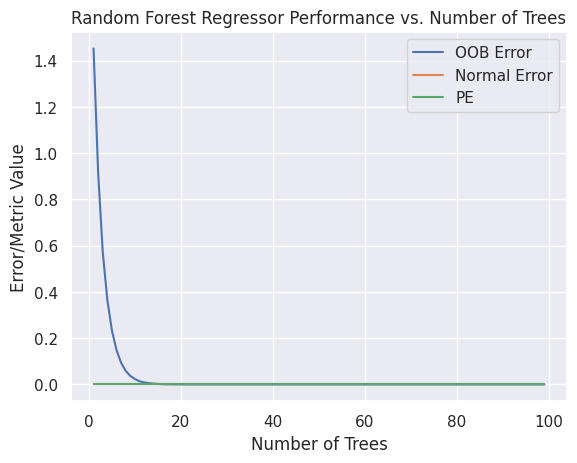

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
X = plot_df[['time_epoch','RSSI', 'MCS', 'speed_kmh_source', 'speed_kmh_destination','precipProbability_source','precipProbability_destination','distance', 'Sub_channels','Packet_error_ratio']]
y = plot_df['Throughput']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#n_trees_range =100
n_trees_range = range(1,100)
oob_errors = []
feature_importance = []
prediction_errors = []
normal_errors=[]
for n_trees in n_trees_range:
    # Train a Random Forest model with 'n_trees' trees
    model = RandomForestRegressor(n_estimators=n_trees, oob_score=True, random_state=42)
    model.fit(X_train, y_train)
    # Collect relevant metrics
    oob_error = 1 - model.oob_score_
    predictions = model.predict(X_test)
    prediction_error = np.mean(predictions != y_test)
    oob_errors.append(oob_error)
    prediction_errors.append(prediction_error)
    normal_errors.append(mean_squared_error(y_test, predictions))
    #feature_importance.append(model.feature_importances_)
# Plot the results
plt.figure()
plt.title("Random Forest Regressor Performance vs. Number of Trees")
plt.xlabel("Number of Trees")
plt.ylabel("Error/Metric Value")

plt.plot(n_trees_range, oob_errors, label="OOB Error")
plt.plot(n_trees_range, normal_errors, label="Normal Error")
plt.plot(n_trees_range, prediction_errors, label="PE")

plt.legend()
plt.show()

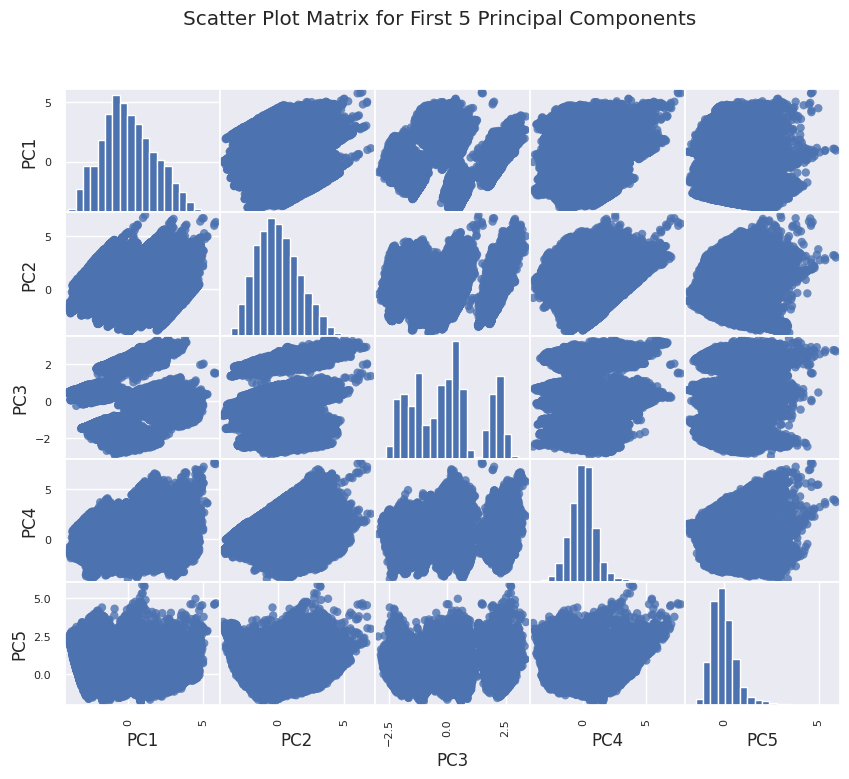

Correlation Matrix:
              PC1           PC2           PC3           PC4           PC5
PC1  1.000000e+00  5.763031e-16 -2.993405e-17 -1.670195e-16 -4.706315e-16
PC2  5.763031e-16  1.000000e+00 -5.160328e-16 -1.028611e-16  1.669391e-17
PC3 -2.993405e-17 -5.160328e-16  1.000000e+00  2.313937e-16  7.871011e-16
PC4 -1.670195e-16 -1.028611e-16  2.313937e-16  1.000000e+00  3.932281e-16
PC5 -4.706315e-16  1.669391e-17  7.871011e-16  3.932281e-16  1.000000e+00


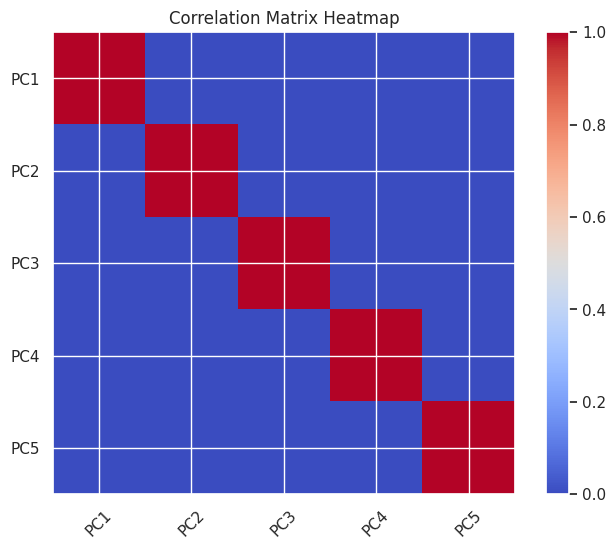

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X = plot_df[['time_epoch','RSSI', 'MCS', 'speed_kmh_source', 'speed_kmh_destination','precipProbability_source','precipProbability_destination','distance', 'Sub_channels','Packet_error_ratio']]
y = plot_df['Throughput']

# Standardize the data (mean=0, variance=1)
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Create a PCA object
n_components = 5  # You can specify the number of components here
pca = PCA(n_components=n_components)

# Fit and transform the data using PCA
X_pca = pca.fit_transform(X_std)

# Create a DataFrame with PCA components
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(n_components)])

# Create a scatterplot matrix of the PCA components
pd.plotting.scatter_matrix(pca_df, figsize=(10, 8), marker='o', hist_kwds={'bins': 20}, alpha=0.8)

plt.suptitle(f'Scatter Plot Matrix for First {n_components} Principal Components')
plt.show()

# Create a correlation matrix to quantify the relationships between PCA components
correlation_matrix = pca_df.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.title("Correlation Matrix Heatmap")
plt.xticks(range(n_components), pca_df.columns, rotation=45)
plt.yticks(range(n_components), pca_df.columns)
plt.show()
